In [1]:
install.packages('fpp3', dependencies = TRUE)
library(fpp3)
install.packages("tidyverse")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ──────────────────────────────────────────── fpp3 0.4.0 ──

✔ tibble      3.1.2      ✔ tsibble     1.0.1 
✔ dplyr       1.0.6      ✔ tsibbledata 0.3.0 
✔ tidyr       1.1.3      ✔ feasts      0.2.1 
✔ lubridate   1.7.10     ✔ fable       0.3.1 
✔ ggplot2     3.3.3      

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



#  12.1 Complex seasonality

- Higher frequency time series often exhibit more complicated seasonal patterns.
- Daily data may have a weekly pattern as well as an annual pattern.
- Hourly data usually has three types of seasonality: a daily pattern, a weekly pattern, and an annual pattern. 


In [2]:
bank_calls

DateTime            Calls
1     2003-03-03 07:00:00 111  
2     2003-03-03 07:05:00 113  
3     2003-03-03 07:10:00  76  
4     2003-03-03 07:15:00  82  
5     2003-03-03 07:20:00  91  
6     2003-03-03 07:25:00  87  
7     2003-03-03 07:30:00  75  
8     2003-03-03 07:35:00  89  
9     2003-03-03 07:40:00  99  
10    2003-03-03 07:45:00 125  
11    2003-03-03 07:50:00  99  
12    2003-03-03 07:55:00 122  
13    2003-03-03 08:00:00 171  
14    2003-03-03 08:05:00 159  
15    2003-03-03 08:10:00 186  
16    2003-03-03 08:15:00 175  
17    2003-03-03 08:20:00 168  
18    2003-03-03 08:25:00 191  
19    2003-03-03 08:30:00 224  
20    2003-03-03 08:35:00 212  
21    2003-03-03 08:40:00 207  
22    2003-03-03 08:45:00 219  
23    2003-03-03 08:50:00 243  
24    2003-03-03 08:55:00 266  
25    2003-03-03 09:00:00 286  
26    2003-03-03 09:05:00 378  
27    2003-03-03 09:10:00 344  
28    2003-03-03 09:15:00 366  
29    2003-03-03 09:20:00 364  
30    2003-03-03 09:25:00 335  
⋮     ⋮                   ⋮    
27687 2003-10-24 18:35:00 102  
27688 2003-10-24 18:40:00  91  
27689 2003-10-24 18:45:00 102  
27690 2003-10-24 18:50:00 101  
27691 2003-10-24 18:55:00  99  
27692 2003-10-24 19:00:00  86  
27693 2003-10-24 19:05:00  73  
27694 2003-10-24 19:10:00  73  
27695 2003-10-24 19:15:00  78  
27696 2003-10-24 19:20:00  73  
27697 2003-10-24 19:25:00  78  
27698 2003-10-24 19:30:00  80  
27699 2003-10-24 19:35:00  82  
27700 2003-10-24 19:40:00  74  
27701 2003-10-24 19:45:00  74  
27702 2003-10-24 19:50:00  70  
27703 2003-10-24 19:55:00  68  
27704 2003-10-24 20:00:00  63  
27705 2003-10-24 20:05:00  72  
27706 2003-10-24 20:10:00  56  
27707 2003-10-24 20:15:00  64  
27708 2003-10-24 20:20:00  67  
27709 2003-10-24 20:25:00  56  
27710 2003-10-24 20:30:00  78  
27711 2003-10-24 20:35:00  56  
27712 2003-10-24 20:40:00  64  
27713 2003-10-24 20:45:00  49  
27714 2003-10-24 20:50:00  54  
27715 2003-10-24 20:55:00  55  
27716 2003-10-24 21:00:00  54

In [3]:
bank_calls %>%
  fill_gaps() 

DateTime            Calls
1     2003-03-03 07:00:00 111  
2     2003-03-03 07:05:00 113  
3     2003-03-03 07:10:00  76  
4     2003-03-03 07:15:00  82  
5     2003-03-03 07:20:00  91  
6     2003-03-03 07:25:00  87  
7     2003-03-03 07:30:00  75  
8     2003-03-03 07:35:00  89  
9     2003-03-03 07:40:00  99  
10    2003-03-03 07:45:00 125  
11    2003-03-03 07:50:00  99  
12    2003-03-03 07:55:00 122  
13    2003-03-03 08:00:00 171  
14    2003-03-03 08:05:00 159  
15    2003-03-03 08:10:00 186  
16    2003-03-03 08:15:00 175  
17    2003-03-03 08:20:00 168  
18    2003-03-03 08:25:00 191  
19    2003-03-03 08:30:00 224  
20    2003-03-03 08:35:00 212  
21    2003-03-03 08:40:00 207  
22    2003-03-03 08:45:00 219  
23    2003-03-03 08:50:00 243  
24    2003-03-03 08:55:00 266  
25    2003-03-03 09:00:00 286  
26    2003-03-03 09:05:00 378  
27    2003-03-03 09:10:00 344  
28    2003-03-03 09:15:00 366  
29    2003-03-03 09:20:00 364  
30    2003-03-03 09:25:00 335  
⋮     ⋮                   ⋮    
67820 2003-10-24 18:35:00 102  
67821 2003-10-24 18:40:00  91  
67822 2003-10-24 18:45:00 102  
67823 2003-10-24 18:50:00 101  
67824 2003-10-24 18:55:00  99  
67825 2003-10-24 19:00:00  86  
67826 2003-10-24 19:05:00  73  
67827 2003-10-24 19:10:00  73  
67828 2003-10-24 19:15:00  78  
67829 2003-10-24 19:20:00  73  
67830 2003-10-24 19:25:00  78  
67831 2003-10-24 19:30:00  80  
67832 2003-10-24 19:35:00  82  
67833 2003-10-24 19:40:00  74  
67834 2003-10-24 19:45:00  74  
67835 2003-10-24 19:50:00  70  
67836 2003-10-24 19:55:00  68  
67837 2003-10-24 20:00:00  63  
67838 2003-10-24 20:05:00  72  
67839 2003-10-24 20:10:00  56  
67840 2003-10-24 20:15:00  64  
67841 2003-10-24 20:20:00  67  
67842 2003-10-24 20:25:00  56  
67843 2003-10-24 20:30:00  78  
67844 2003-10-24 20:35:00  56  
67845 2003-10-24 20:40:00  64  
67846 2003-10-24 20:45:00  49  
67847 2003-10-24 20:50:00  54  
67848 2003-10-24 20:55:00  55  
67849 2003-10-24 21:00:00  54

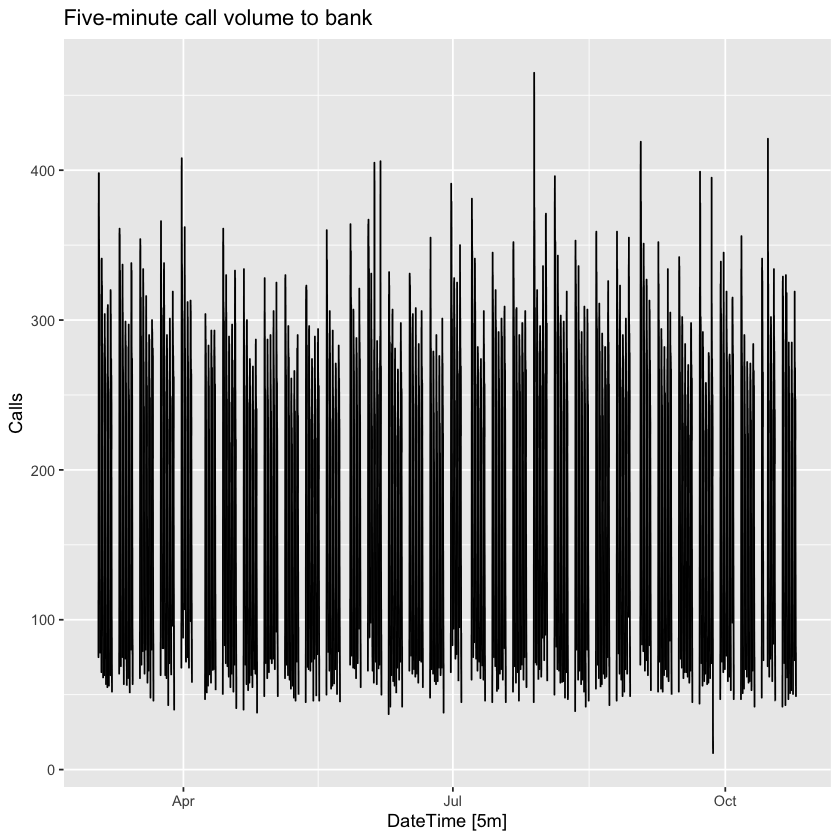

In [5]:
bank_calls %>%
  fill_gaps() %>%
  autoplot(Calls) +
  labs(y = "Calls",
       title = "Five-minute call volume to bank")

- the number of calls to a North American commercial bank per 5-minute interval between 7:00am and 9:05pm each weekday over a 33 week period.
- Apart from the multiple seasonal periods, this series has the additional complexity of missing values between the working periods

# STL with multiple seasonal periods
- The STL() function is designed to deal with multiple seasonality.
- It will return multiple seasonal components, as well as a trend and remainder component. 
- In this case, we need to re-index the tsibble to avoid the missing values, and then explicitly give the seasonal periods.

In [7]:
calls <- bank_calls %>%
 mutate(t=row_number())

calls

DateTime            Calls t    
1     2003-03-03 07:00:00 111    1   
2     2003-03-03 07:05:00 113    2   
3     2003-03-03 07:10:00  76    3   
4     2003-03-03 07:15:00  82    4   
5     2003-03-03 07:20:00  91    5   
6     2003-03-03 07:25:00  87    6   
7     2003-03-03 07:30:00  75    7   
8     2003-03-03 07:35:00  89    8   
9     2003-03-03 07:40:00  99    9   
10    2003-03-03 07:45:00 125   10   
11    2003-03-03 07:50:00  99   11   
12    2003-03-03 07:55:00 122   12   
13    2003-03-03 08:00:00 171   13   
14    2003-03-03 08:05:00 159   14   
15    2003-03-03 08:10:00 186   15   
16    2003-03-03 08:15:00 175   16   
17    2003-03-03 08:20:00 168   17   
18    2003-03-03 08:25:00 191   18   
19    2003-03-03 08:30:00 224   19   
20    2003-03-03 08:35:00 212   20   
21    2003-03-03 08:40:00 207   21   
22    2003-03-03 08:45:00 219   22   
23    2003-03-03 08:50:00 243   23   
24    2003-03-03 08:55:00 266   24   
25    2003-03-03 09:00:00 286   25   
26    2003-03-03 09:05:00 378   26   
27    2003-03-03 09:10:00 344   27   
28    2003-03-03 09:15:00 366   28   
29    2003-03-03 09:20:00 364   29   
30    2003-03-03 09:25:00 335   30   
⋮     ⋮                   ⋮     ⋮    
27687 2003-10-24 18:35:00 102   27687
27688 2003-10-24 18:40:00  91   27688
27689 2003-10-24 18:45:00 102   27689
27690 2003-10-24 18:50:00 101   27690
27691 2003-10-24 18:55:00  99   27691
27692 2003-10-24 19:00:00  86   27692
27693 2003-10-24 19:05:00  73   27693
27694 2003-10-24 19:10:00  73   27694
27695 2003-10-24 19:15:00  78   27695
27696 2003-10-24 19:20:00  73   27696
27697 2003-10-24 19:25:00  78   27697
27698 2003-10-24 19:30:00  80   27698
27699 2003-10-24 19:35:00  82   27699
27700 2003-10-24 19:40:00  74   27700
27701 2003-10-24 19:45:00  74   27701
27702 2003-10-24 19:50:00  70   27702
27703 2003-10-24 19:55:00  68   27703
27704 2003-10-24 20:00:00  63   27704
27705 2003-10-24 20:05:00  72   27705
27706 2003-10-24 20:10:00  56   27706
27707 2003-10-24 20:15:00  64   27707
27708 2003-10-24 20:20:00  67   27708
27709 2003-10-24 20:25:00  56   27709
27710 2003-10-24 20:30:00  78   27710
27711 2003-10-24 20:35:00  56   27711
27712 2003-10-24 20:40:00  64   27712
27713 2003-10-24 20:45:00  49   27713
27714 2003-10-24 20:50:00  54   27714
27715 2003-10-24 20:55:00  55   27715
27716 2003-10-24 21:00:00  54   27716

In [9]:
calls <- bank_calls %>%
 mutate(t=row_number()) %>%
 update_tsibble(index=t, regular=TRUE)

calls

DateTime            Calls t    
1     2003-03-03 07:00:00 111    1   
2     2003-03-03 07:05:00 113    2   
3     2003-03-03 07:10:00  76    3   
4     2003-03-03 07:15:00  82    4   
5     2003-03-03 07:20:00  91    5   
6     2003-03-03 07:25:00  87    6   
7     2003-03-03 07:30:00  75    7   
8     2003-03-03 07:35:00  89    8   
9     2003-03-03 07:40:00  99    9   
10    2003-03-03 07:45:00 125   10   
11    2003-03-03 07:50:00  99   11   
12    2003-03-03 07:55:00 122   12   
13    2003-03-03 08:00:00 171   13   
14    2003-03-03 08:05:00 159   14   
15    2003-03-03 08:10:00 186   15   
16    2003-03-03 08:15:00 175   16   
17    2003-03-03 08:20:00 168   17   
18    2003-03-03 08:25:00 191   18   
19    2003-03-03 08:30:00 224   19   
20    2003-03-03 08:35:00 212   20   
21    2003-03-03 08:40:00 207   21   
22    2003-03-03 08:45:00 219   22   
23    2003-03-03 08:50:00 243   23   
24    2003-03-03 08:55:00 266   24   
25    2003-03-03 09:00:00 286   25   
26    2003-03-03 09:05:00 378   26   
27    2003-03-03 09:10:00 344   27   
28    2003-03-03 09:15:00 366   28   
29    2003-03-03 09:20:00 364   29   
30    2003-03-03 09:25:00 335   30   
⋮     ⋮                   ⋮     ⋮    
27687 2003-10-24 18:35:00 102   27687
27688 2003-10-24 18:40:00  91   27688
27689 2003-10-24 18:45:00 102   27689
27690 2003-10-24 18:50:00 101   27690
27691 2003-10-24 18:55:00  99   27691
27692 2003-10-24 19:00:00  86   27692
27693 2003-10-24 19:05:00  73   27693
27694 2003-10-24 19:10:00  73   27694
27695 2003-10-24 19:15:00  78   27695
27696 2003-10-24 19:20:00  73   27696
27697 2003-10-24 19:25:00  78   27697
27698 2003-10-24 19:30:00  80   27698
27699 2003-10-24 19:35:00  82   27699
27700 2003-10-24 19:40:00  74   27700
27701 2003-10-24 19:45:00  74   27701
27702 2003-10-24 19:50:00  70   27702
27703 2003-10-24 19:55:00  68   27703
27704 2003-10-24 20:00:00  63   27704
27705 2003-10-24 20:05:00  72   27705
27706 2003-10-24 20:10:00  56   27706
27707 2003-10-24 20:15:00  64   27707
27708 2003-10-24 20:20:00  67   27708
27709 2003-10-24 20:25:00  56   27709
27710 2003-10-24 20:30:00  78   27710
27711 2003-10-24 20:35:00  56   27711
27712 2003-10-24 20:40:00  64   27712
27713 2003-10-24 20:45:00  49   27713
27714 2003-10-24 20:50:00  54   27714
27715 2003-10-24 20:55:00  55   27715
27716 2003-10-24 21:00:00  54   27716

In [13]:
calls %>%
 model(
     STL(sqrt(Calls)~season(period=169)+ season(period=5*169),robust=TRUE) 
      )

STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
1 <STL>

In [14]:
calls %>%
 model(
     STL(sqrt(Calls)~season(period=169)+ season(period=5*169),robust=TRUE) 
      ) %>%
components()

.model                                                                                 
1     STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
2     STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
3     STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
4     STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
5     STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
6     STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
7     STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
8     STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
9     STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
10    STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
11    STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
12    STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
13    STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
14    STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
15    STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
16    STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
17    STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
18    STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
19    STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
20    STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
21    STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
22    STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
23    STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
24    STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
25    STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
26    STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
27    STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
28    STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
29    STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
30    STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
⋮     ⋮                                                                                      
27687 STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
27688 STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
27689 STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
27690 STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
27691 STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
27692 STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
27693 STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
27694 STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
27695 STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
27696 STL(sqrt(Calls) ~ season(period = 169) + season(period = 5 * \n    169), robust = TRUE)
27697 STL(sqrt(Calls) ~ season(period = 169) + season(peri

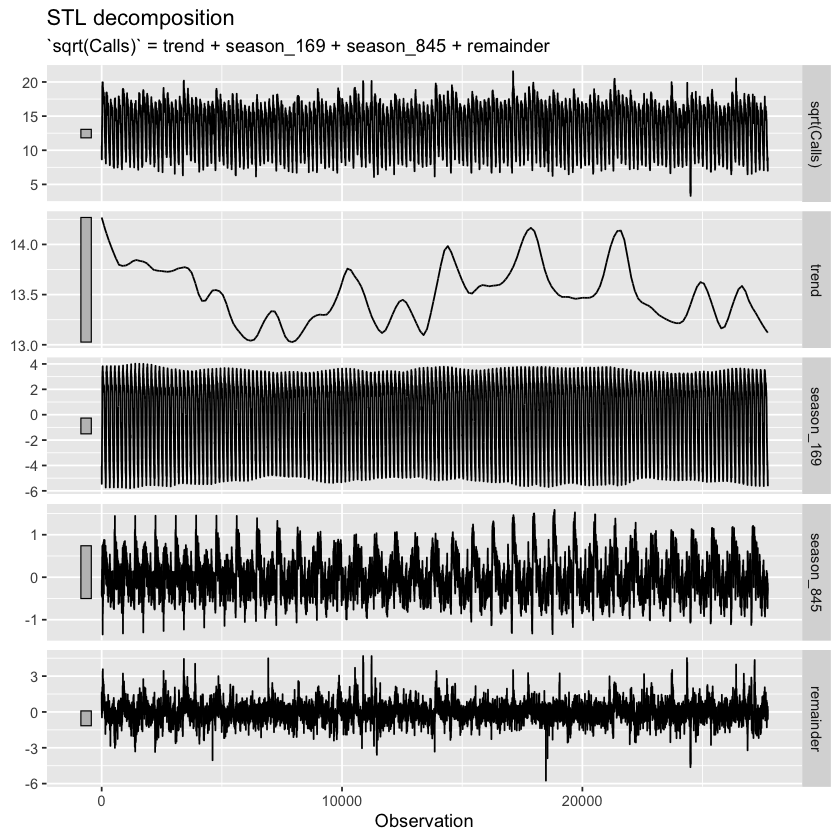

In [15]:
calls %>%
 model(
     STL(sqrt(Calls)~season(period=169)+ season(period=5*169),robust=TRUE) 
      ) %>%
components() %>%
autoplot() + labs(x="Observation")

- There are two seasonal patterns shown, one for the time of day (the third panel), and one for the time of week (the fourth panel).
- To properly interpret this graph, it is important to notice the vertical scales. 
- In this case, the trend and the weekly seasonality have wider bars (and therefore relatively narrower ranges) compared to the other components, because there is little trend seen in the data, and the weekly seasonality is weak.

In [16]:
# Forecasts from STL+ETS decomposition
my_dcmp_spec <- decomposition_model(
STL(sqrt(Calls)~season(period=169)+season(period=5*169),robust=TRUE),
ETS(season_adjust~season("N"))
 )

In [19]:
my_dcmp_spec

<dcmp_mdl model definition>

In [20]:
fc<- calls %>%
 model(my_dcmp_spec) %>%
forecast(h=5*169)

In [21]:
fc

.model       t     Calls           .mean    
1   my_dcmp_spec 27717 t(N(8.7, 0.24))  76.31799
2   my_dcmp_spec 27718 t(N(9.3, 0.25))  85.98592
3   my_dcmp_spec 27719 t(N(8.7, 0.25))  75.91397
4   my_dcmp_spec 27720 t(N(8.8, 0.26))  77.22161
5   my_dcmp_spec 27721 t(N(8.8, 0.27))  77.58297
6   my_dcmp_spec 27722 t(N(8.8, 0.27))  77.43157
7   my_dcmp_spec 27723 t(N(9.2, 0.28))  84.53366
8   my_dcmp_spec 27724 t(N(9, 0.29))    82.07671
9   my_dcmp_spec 27725 t(N(9.2, 0.3))   85.27687
10  my_dcmp_spec 27726 t(N(9.5, 0.3))   91.05555
11  my_dcmp_spec 27727 t(N(9.7, 0.31))  95.17887
12  my_dcmp_spec 27728 t(N(9.6, 0.32))  91.95772
13  my_dcmp_spec 27729 t(N(10, 0.32))  105.88738
14  my_dcmp_spec 27730 t(N(11, 0.33))  114.42665
15  my_dcmp_spec 27731 t(N(11, 0.34))  129.88981
16  my_dcmp_spec 27732 t(N(11, 0.35))  128.55161
17  my_dcmp_spec 27733 t(N(12, 0.35))  133.00236
18  my_dcmp_spec 27734 t(N(12, 0.36))  152.10999
19  my_dcmp_spec 27735 t(N(13, 0.37))  160.83558
20  my_dcmp_spec 27736 t(N(13, 0.37))  160.30072
21  my_dcmp_spec 27737 t(N(13, 0.38))  179.28702
22  my_dcmp_spec 27738 t(N(13, 0.39))  166.42534
23  my_dcmp_spec 27739 t(N(13, 0.39))  176.21866
24  my_dcmp_spec 27740 t(N(14, 0.4))   200.02435
25  my_dcmp_spec 27741 t(N(15, 0.41))  216.60680
26  my_dcmp_spec 27742 t(N(15, 0.42))  233.45378
27  my_dcmp_spec 27743 t(N(16, 0.42))  241.82524
28  my_dcmp_spec 27744 t(N(16, 0.43))  242.19668
29  my_dcmp_spec 27745 t(N(16, 0.44))  261.12718
30  my_dcmp_spec 27746 t(N(16, 0.44))  270.05207
⋮   ⋮            ⋮     ⋮               ⋮        
816 my_dcmp_spec 28532 t(N(10, 6.1))   105.93575
817 my_dcmp_spec 28533 t(N(9.5, 6.2))   96.21707
818 my_dcmp_spec 28534 t(N(10, 6.2))   108.06588
819 my_dcmp_spec 28535 t(N(9.8, 6.2))  102.08379
820 my_dcmp_spec 28536 t(N(9.6, 6.2))   98.21181
821 my_dcmp_spec 28537 t(N(9, 6.2))     87.56167
822 my_dcmp_spec 28538 t(N(8.9, 6.2))   84.62329
823 my_dcmp_spec 28539 t(N(9.1, 6.2))   89.03343
824 my_dcmp_spec 28540 t(N(9.1, 6.2))   89.38629
825 my_dcmp_spec 28541 t(N(9, 6.2))     87.46903
826 my_dcmp_spec 28542 t(N(9.1, 6.2))   88.98007
827 my_dcmp_spec 28543 t(N(9, 6.2))     87.96822
828 my_dcmp_spec 28544 t(N(9.3, 6.2))   92.09055
829 my_dcmp_spec 28545 t(N(8.8, 6.2))   83.58090
830 my_dcmp_spec 28546 t(N(8.7, 6.3))   82.34735
831 my_dcmp_spec 28547 t(N(8.5, 6.3))   78.92997
832 my_dcmp_spec 28548 t(N(8.4, 6.3))   77.64068
833 my_dcmp_spec 28549 t(N(8, 6.3))     69.64771
834 my_dcmp_spec 28550 t(N(8, 6.3))     71.00619
835 my_dcmp_spec 28551 t(N(7.8, 6.3))   67.43345
836 my_dcmp_spec 28552 t(N(7.9, 6.3))   69.29594
837 my_dcmp_spec 28553 t(N(8.5, 6.3))   78.15423
838 my_dcmp_spec 28554 t(N(7.5, 6.3))   62.96376
839 my_dcmp_spec 28555 t(N(8.3, 6.3))   75.09019
840 my_dcmp_spec 28556 t(N(8, 6.3))     69.87134
841 my_dcmp_spec 28557 t(N(7.7, 6.3))   65.78691
842 my_dcmp_spec 28558 t(N(7.3, 6.3))   59.04689
843 my_dcmp_spec 28559 t(N(7.4, 6.3))   61.16749
844 my_dcmp_spec 28560 t(N(7.5, 6.4))   62.66341
845 my_dcmp_spec 28561 t(N(7.1, 6.4))   56.39801

In [22]:
# Add correct time stamps to fable
fc_with_times <- bank_calls %>%
 new_data(n=7*24*60 /5) %>%
 mutate(time=format(DateTime, format="%H:%M:%S"))

In [24]:
# Add correct time stamps to fable
fc_with_times <- bank_calls %>%
 new_data(n=7*24*60 /5) %>%
 mutate(time=format(DateTime, format="%H:%M:%S")) %>%
filter(
time %in% format(bank_calls$DateTime,format="%H:%M:%S"),
    wday(DateTime,week_start=1)<=5
      )

In [25]:
fc_with_times

DateTime            time    
1   2003-10-27 07:00:00 07:00:00
2   2003-10-27 07:05:00 07:05:00
3   2003-10-27 07:10:00 07:10:00
4   2003-10-27 07:15:00 07:15:00
5   2003-10-27 07:20:00 07:20:00
6   2003-10-27 07:25:00 07:25:00
7   2003-10-27 07:30:00 07:30:00
8   2003-10-27 07:35:00 07:35:00
9   2003-10-27 07:40:00 07:40:00
10  2003-10-27 07:45:00 07:45:00
11  2003-10-27 07:50:00 07:50:00
12  2003-10-27 07:55:00 07:55:00
13  2003-10-27 08:00:00 08:00:00
14  2003-10-27 08:05:00 08:05:00
15  2003-10-27 08:10:00 08:10:00
16  2003-10-27 08:15:00 08:15:00
17  2003-10-27 08:20:00 08:20:00
18  2003-10-27 08:25:00 08:25:00
19  2003-10-27 08:30:00 08:30:00
20  2003-10-27 08:35:00 08:35:00
21  2003-10-27 08:40:00 08:40:00
22  2003-10-27 08:45:00 08:45:00
23  2003-10-27 08:50:00 08:50:00
24  2003-10-27 08:55:00 08:55:00
25  2003-10-27 09:00:00 09:00:00
26  2003-10-27 09:05:00 09:05:00
27  2003-10-27 09:10:00 09:10:00
28  2003-10-27 09:15:00 09:15:00
29  2003-10-27 09:20:00 09:20:00
30  2003-10-27 09:25:00 09:25:00
⋮   ⋮                   ⋮       
816 2003-10-31 18:35:00 18:35:00
817 2003-10-31 18:40:00 18:40:00
818 2003-10-31 18:45:00 18:45:00
819 2003-10-31 18:50:00 18:50:00
820 2003-10-31 18:55:00 18:55:00
821 2003-10-31 19:00:00 19:00:00
822 2003-10-31 19:05:00 19:05:00
823 2003-10-31 19:10:00 19:10:00
824 2003-10-31 19:15:00 19:15:00
825 2003-10-31 19:20:00 19:20:00
826 2003-10-31 19:25:00 19:25:00
827 2003-10-31 19:30:00 19:30:00
828 2003-10-31 19:35:00 19:35:00
829 2003-10-31 19:40:00 19:40:00
830 2003-10-31 19:45:00 19:45:00
831 2003-10-31 19:50:00 19:50:00
832 2003-10-31 19:55:00 19:55:00
833 2003-10-31 20:00:00 20:00:00
834 2003-10-31 20:05:00 20:05:00
835 2003-10-31 20:10:00 20:10:00
836 2003-10-31 20:15:00 20:15:00
837 2003-10-31 20:20:00 20:20:00
838 2003-10-31 20:25:00 20:25:00
839 2003-10-31 20:30:00 20:30:00
840 2003-10-31 20:35:00 20:35:00
841 2003-10-31 20:40:00 20:40:00
842 2003-10-31 20:45:00 20:45:00
843 2003-10-31 20:50:00 20:50:00
844 2003-10-31 20:55:00 20:55:00
845 2003-10-31 21:00:00 21:00:00

In [26]:
# Add correct time stamps to fable
fc_with_times <- bank_calls %>%
 new_data(n=7*24*60 /5) %>%
 mutate(time=format(DateTime, format="%H:%M:%S")) %>%
filter(
time %in% format(bank_calls$DateTime,format="%H:%M:%S"),
    wday(DateTime,week_start=1)<=5
      ) %>%
 mutate(t=row_number()+max(calls$t)) %>%
left_join(fc,by="t") %>%
as_fable(response="Calls",distribution=Calls)

In [27]:
fc_with_times

DateTime            time     t     .model       Calls           .mean    
1   2003-10-27 07:00:00 07:00:00 27717 my_dcmp_spec t(N(8.7, 0.24))  76.31799
2   2003-10-27 07:05:00 07:05:00 27718 my_dcmp_spec t(N(9.3, 0.25))  85.98592
3   2003-10-27 07:10:00 07:10:00 27719 my_dcmp_spec t(N(8.7, 0.25))  75.91397
4   2003-10-27 07:15:00 07:15:00 27720 my_dcmp_spec t(N(8.8, 0.26))  77.22161
5   2003-10-27 07:20:00 07:20:00 27721 my_dcmp_spec t(N(8.8, 0.27))  77.58297
6   2003-10-27 07:25:00 07:25:00 27722 my_dcmp_spec t(N(8.8, 0.27))  77.43157
7   2003-10-27 07:30:00 07:30:00 27723 my_dcmp_spec t(N(9.2, 0.28))  84.53366
8   2003-10-27 07:35:00 07:35:00 27724 my_dcmp_spec t(N(9, 0.29))    82.07671
9   2003-10-27 07:40:00 07:40:00 27725 my_dcmp_spec t(N(9.2, 0.3))   85.27687
10  2003-10-27 07:45:00 07:45:00 27726 my_dcmp_spec t(N(9.5, 0.3))   91.05555
11  2003-10-27 07:50:00 07:50:00 27727 my_dcmp_spec t(N(9.7, 0.31))  95.17887
12  2003-10-27 07:55:00 07:55:00 27728 my_dcmp_spec t(N(9.6, 0.32))  91.95772
13  2003-10-27 08:00:00 08:00:00 27729 my_dcmp_spec t(N(10, 0.32))  105.88738
14  2003-10-27 08:05:00 08:05:00 27730 my_dcmp_spec t(N(11, 0.33))  114.42665
15  2003-10-27 08:10:00 08:10:00 27731 my_dcmp_spec t(N(11, 0.34))  129.88981
16  2003-10-27 08:15:00 08:15:00 27732 my_dcmp_spec t(N(11, 0.35))  128.55161
17  2003-10-27 08:20:00 08:20:00 27733 my_dcmp_spec t(N(12, 0.35))  133.00236
18  2003-10-27 08:25:00 08:25:00 27734 my_dcmp_spec t(N(12, 0.36))  152.10999
19  2003-10-27 08:30:00 08:30:00 27735 my_dcmp_spec t(N(13, 0.37))  160.83558
20  2003-10-27 08:35:00 08:35:00 27736 my_dcmp_spec t(N(13, 0.37))  160.30072
21  2003-10-27 08:40:00 08:40:00 27737 my_dcmp_spec t(N(13, 0.38))  179.28702
22  2003-10-27 08:45:00 08:45:00 27738 my_dcmp_spec t(N(13, 0.39))  166.42534
23  2003-10-27 08:50:00 08:50:00 27739 my_dcmp_spec t(N(13, 0.39))  176.21866
24  2003-10-27 08:55:00 08:55:00 27740 my_dcmp_spec t(N(14, 0.4))   200.02435
25  2003-10-27 09:00:00 09:00:00 27741 my_dcmp_spec t(N(15, 0.41))  216.60680
26  2003-10-27 09:05:00 09:05:00 27742 my_dcmp_spec t(N(15, 0.42))  233.45378
27  2003-10-27 09:10:00 09:10:00 27743 my_dcmp_spec t(N(16, 0.42))  241.82524
28  2003-10-27 09:15:00 09:15:00 27744 my_dcmp_spec t(N(16, 0.43))  242.19668
29  2003-10-27 09:20:00 09:20:00 27745 my_dcmp_spec t(N(16, 0.44))  261.12718
30  2003-10-27 09:25:00 09:25:00 27746 my_dcmp_spec t(N(16, 0.44))  270.05207
⋮   ⋮                   ⋮        ⋮     ⋮            ⋮               ⋮        
816 2003-10-31 18:35:00 18:35:00 28532 my_dcmp_spec t(N(10, 6.1))   105.93575
817 2003-10-31 18:40:00 18:40:00 28533 my_dcmp_spec t(N(9.5, 6.2))   96.21707
818 2003-10-31 18:45:00 18:45:00 28534 my_dcmp_spec t(N(10, 6.2))   108.06588
819 2003-10-31 18:50:00 18:50:00 28535 my_dcmp_spec t(N(9.8, 6.2))  102.08379
820 2003-10-31 18:55:00 18:55:00 28536 my_dcmp_spec t(N(9.6, 6.2))   98.21181
821 2003-10-31 19:00:00 19:00:00 28537 my_dcmp_spec t(N(9, 6.2))     87.56167
822 2003-10-31 19:05:00 19:05:00 28538 my_dcmp_spec t(N(8.9, 6.2))   84.62329
823 2003-10-31 19:10:00 19:10:00 28539 my_dcmp_spec t(N(9.1, 6.2))   89.03343
824 2003-10-31 19:15:00 19:15:00 28540 my_dcmp_spec t(N(9.1, 6.2))   89.38629
825 2003-10-31 19:20:00 19:20:00 28541 my_dcmp_spec t(N(9, 6.2))     87.46903
826 2003-10-31 19:25:00 19:25:00 28542 my_dcmp_spec t(N(9.1, 6.2))   88.98007
827 2003-10-31 19:30:00 19:30:00 28543 my_dcmp_spec t(N(9, 6.2))     87.96822
828 2003-10-31 19:35:00 19:35:00 28544 my_dcmp_spec t(N(9.3, 6.2))   92.09055
829 2003-10-31 19:40:00 19:40:00 28545 my_dcmp_spec t(N(8.8, 6.2))   83.58090
830 2003-10-31 19:45:00 19:45:00 28546 my_dcmp_spec t(N(8.7, 6.3))   82.34735
831 2003-10-31 19:50:00 19:50:00 28547 my_dcmp_spec t(N(8.5, 6.3))   78.92997
832 2003-10-31 19:55:00 19:55:00 28548 my_dcmp_spec t(N(8.4, 6.3))   77.64068
833 2003-10-31 20:00:00 20:00:00 28549 my_dcmp_spec t(N(8, 6.3))     69.64771
834 2003-10-31 20:05:00 20:05:00 28550 my_dcmp_spec t(N(8, 6.3))     71.00619
835 2003-10-31 20:10:00 20

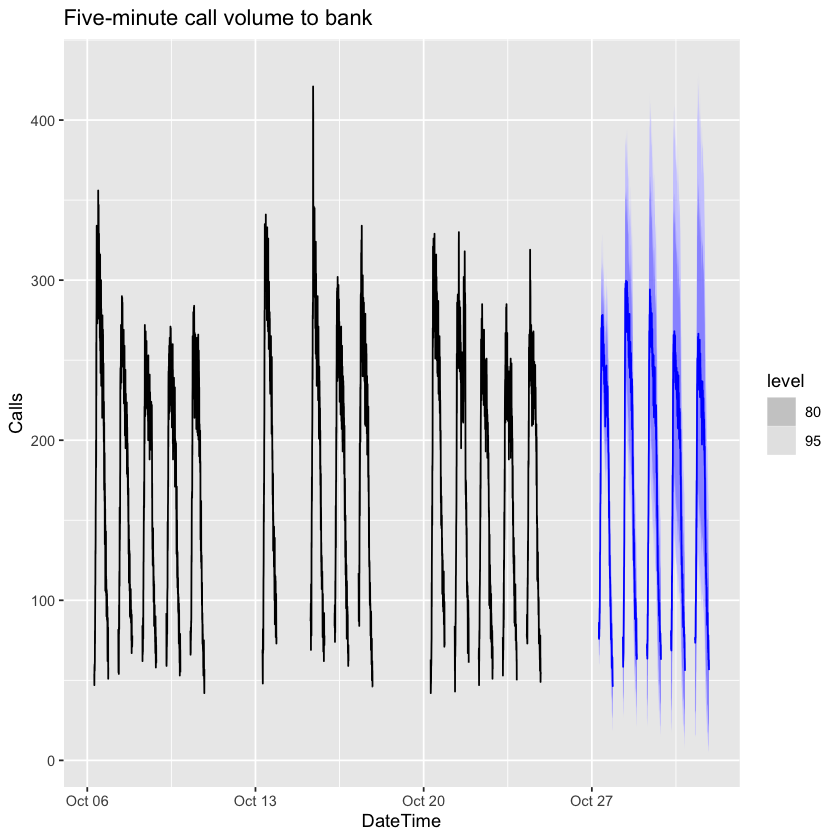

In [28]:
# Plot results with last 3 weeks of data
fc_with_times %>%
 fill_gaps() %>%
 autoplot(bank_calls %>% tail(14*169) %>% fill_gaps())+
 labs(y="Calls", title="Five-minute call volume to bank")

# Dynamic harmonic regression with multiple seasonal periods
- We will fit a dynamic harmonic regression model with an ARIMA error structure. The total number of Fourier terms for each seasonal period could be selected to minimise the AICc.
- we will use a square root transformation to ensure the forecasts and prediction intervals remain positive.
- for high seasonal periods, this tends to over-estimate the number of terms required, so we will use a more subjective choice with 10 terms for the daily seasonality and 5 for the weekly seasonality.
- We set  $D=d=0$
  in order to handle the non-stationarity through the regression terms, and  $P=Q=0$
  in order to handle the seasonality through the regression terms.

In [29]:
fit <-calls %>%
 model(
  dgr=ARIMA(sqrt(Calls) ~ PDQ(0,0,0)+pdq(d=0)+fourier(period =169,K=10)+
            fourier(period=5*169,K=5))
      )

Warning message:
“Provided exogenous regressors are rank deficient, removing regressors: `fourier(period = 5 * 169, K = 5)C5_845`, `fourier(period = 5 * 169, K = 5)S5_845`”


In [30]:
fit

dgr                        
1 <LM w/ ARIMA(1,0,3) errors>

In [32]:
fc <- fit %>% forecast(h = 5 * 169)
fc

.model t     Calls           .mean    
1   dgr    27717 t(N(7.5, 0.32))  56.67854
2   dgr    27718 t(N(7.5, 0.35))  57.09438
3   dgr    27719 t(N(7.6, 0.36))  57.73472
4   dgr    27720 t(N(7.6, 0.37))  58.68887
5   dgr    27721 t(N(7.7, 0.38))  60.13731
6   dgr    27722 t(N(7.9, 0.39))  62.14822
7   dgr    27723 t(N(8, 0.4))     64.77567
8   dgr    27724 t(N(8.2, 0.41))  68.05668
9   dgr    27725 t(N(8.5, 0.42))  72.00923
10  dgr    27726 t(N(8.7, 0.43))  76.63161
11  dgr    27727 t(N(9, 0.44))    81.90335
12  dgr    27728 t(N(9.3, 0.45))  87.78809
13  dgr    27729 t(N(9.7, 0.46))  94.23837
14  dgr    27730 t(N(10, 0.46))  101.20173
15  dgr    27731 t(N(10, 0.47))  108.62722
16  dgr    27732 t(N(11, 0.48))  116.47107
17  dgr    27733 t(N(11, 0.49))  124.70034
18  dgr    27734 t(N(12, 0.5))   133.29329
19  dgr    27735 t(N(12, 0.5))   142.23633
20  dgr    27736 t(N(12, 0.51))  151.51737
21  dgr    27737 t(N(13, 0.52))  161.11650
22  dgr    27738 t(N(13, 0.52))  170.99545
23  dgr    27739 t(N(13, 0.53))  181.08735
24  dgr    27740 t(N(14, 0.54))  191.28892
25  dgr    27741 t(N(14, 0.54))  201.45686
26  dgr    27742 t(N(15, 0.55))  211.40988
27  dgr    27743 t(N(15, 0.55))  220.93726
28  dgr    27744 t(N(15, 0.56))  229.81369
29  dgr    27745 t(N(15, 0.57))  237.81903
30  dgr    27746 t(N(16, 0.57))  244.76067
⋮   ⋮      ⋮     ⋮               ⋮        
816 dgr    28532 t(N(11, 0.78))  114.39176
817 dgr    28533 t(N(11, 0.78))  112.09717
818 dgr    28534 t(N(10, 0.78))  109.97729
819 dgr    28535 t(N(10, 0.78))  108.02352
820 dgr    28536 t(N(10, 0.78))  106.21064
821 dgr    28537 t(N(10, 0.78))  104.50044
822 dgr    28538 t(N(10, 0.78))  102.84719
823 dgr    28539 t(N(10, 0.78))  101.20425
824 dgr    28540 t(N(9.9, 0.78))  99.53083
825 dgr    28541 t(N(9.8, 0.78))  97.79800
826 dgr    28542 t(N(9.8, 0.78))  95.99293
827 dgr    28543 t(N(9.7, 0.78))  94.12084
828 dgr    28544 t(N(9.6, 0.78))  92.20418
829 dgr    28545 t(N(9.5, 0.78))  90.27929
830 dgr    28546 t(N(9.4, 0.78))  88.39109
831 dgr    28547 t(N(9.3, 0.78))  86.58664
832 dgr    28548 t(N(9.2, 0.78))  84.90854
833 dgr    28549 t(N(9.1, 0.78))  83.38924
834 dgr    28550 t(N(9, 0.78))    82.04690
835 dgr    28551 t(N(9, 0.78))    80.88336
836 dgr    28552 t(N(8.9, 0.78))  79.88445
837 dgr    28553 t(N(8.8, 0.78))  79.02262
838 dgr    28554 t(N(8.8, 0.78))  78.26163
839 dgr    28555 t(N(8.8, 0.78))  77.56279
840 dgr    28556 t(N(8.7, 0.78))  76.89201
841 dgr    28557 t(N(8.7, 0.78))  76.22680
842 dgr    28558 t(N(8.6, 0.78))  75.56211
843 dgr    28559 t(N(8.6, 0.78))  74.91425
844 dgr    28560 t(N(8.6, 0.78))  74.32223
845 dgr    28561 t(N(8.5, 0.78))  73.84629

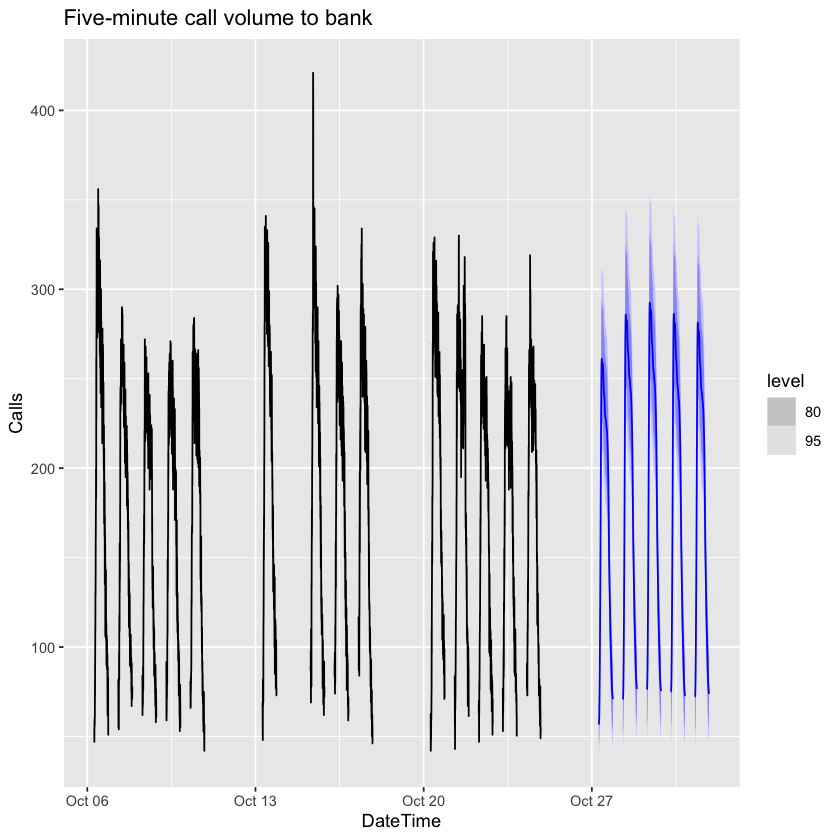

In [33]:
fc_with_times <- bank_calls %>%
  new_data(n = 7 * 24 * 60 / 5) %>%
  mutate(time = format(DateTime, format = "%H:%M:%S")) %>%
  filter(
    time %in% format(bank_calls$DateTime, format = "%H:%M:%S"),
    wday(DateTime, week_start = 1) <= 5
  ) %>%
  mutate(t = row_number() + max(calls$t)) %>%
  left_join(fc, by = "t") %>%
  as_fable(response = "Calls", distribution = Calls)
# Plot results with last 3 weeks of data
fc_with_times %>%
  fill_gaps() %>%
  autoplot(bank_calls %>% tail(14 * 169) %>% fill_gaps()) +
  labs(y = "Calls",
       title = "Five-minute call volume to bank")

This is a large model, containing 33 parameters: 4 ARMA coefficients, 20 Fourier coefficients for period 169, and 8 Fourier coefficients for period 845. Not all of the Fourier terms for period 845 are used because there is some overlap with the terms of period 169 (since  
$845=5×169$
 ).

## Example: Electricity demand

Data: half-hourly electricity demand (MWh) in Victoria, Australia, during 2012–2014, along with temperatures (degrees Celsius) for the same period for Melbourne (the largest city in Victoria)

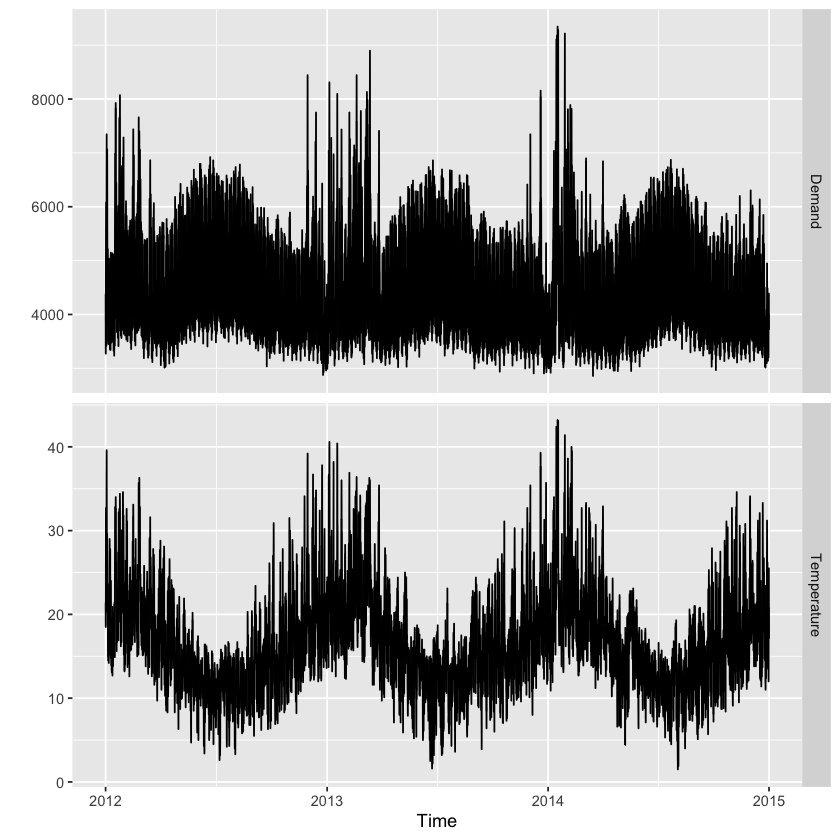

In [34]:
vic_elec %>%
  pivot_longer(Demand:Temperature, names_to = "Series") %>%
  ggplot(aes(x = Time, y = value)) +
  geom_line() +
  facet_grid(rows = vars(Series), scales = "free_y") +
  labs(y = "")

In [35]:
vic_elec

Time                Demand   Temperature Date       Holiday
1     2012-01-01 00:00:00 4382.825 21.40       2012-01-01 TRUE   
2     2012-01-01 00:30:00 4263.366 21.05       2012-01-01 TRUE   
3     2012-01-01 01:00:00 4048.966 20.70       2012-01-01 TRUE   
4     2012-01-01 01:30:00 3877.563 20.55       2012-01-01 TRUE   
5     2012-01-01 02:00:00 4036.230 20.40       2012-01-01 TRUE   
6     2012-01-01 02:30:00 3865.597 20.25       2012-01-01 TRUE   
7     2012-01-01 03:00:00 3694.098 20.10       2012-01-01 TRUE   
8     2012-01-01 03:30:00 3561.624 19.60       2012-01-01 TRUE   
9     2012-01-01 04:00:00 3433.035 19.10       2012-01-01 TRUE   
10    2012-01-01 04:30:00 3359.468 18.95       2012-01-01 TRUE   
11    2012-01-01 05:00:00 3331.343 18.80       2012-01-01 TRUE   
12    2012-01-01 05:30:00 3304.641 18.65       2012-01-01 TRUE   
13    2012-01-01 06:00:00 3272.106 18.50       2012-01-01 TRUE   
14    2012-01-01 06:30:00 3275.998 18.85       2012-01-01 TRUE   
15    2012-01-01 07:00:00 3370.424 19.20       2012-01-01 TRUE   
16    2012-01-01 07:30:00 3494.418 20.10       2012-01-01 TRUE   
17    2012-01-01 08:00:00 3580.091 21.00       2012-01-01 TRUE   
18    2012-01-01 08:30:00 3719.985 22.55       2012-01-01 TRUE   
19    2012-01-01 09:00:00 3909.301 24.10       2012-01-01 TRUE   
20    2012-01-01 09:30:00 4092.566 25.20       2012-01-01 TRUE   
21    2012-01-01 10:00:00 4245.025 26.30       2012-01-01 TRUE   
22    2012-01-01 10:30:00 4413.075 27.70       2012-01-01 TRUE   
23    2012-01-01 11:00:00 4599.507 29.10       2012-01-01 TRUE   
24    2012-01-01 11:30:00 4772.134 30.20       2012-01-01 TRUE   
25    2012-01-01 12:00:00 4938.796 31.30       2012-01-01 TRUE   
26    2012-01-01 12:30:00 5080.138 32.00       2012-01-01 TRUE   
27    2012-01-01 13:00:00 5211.915 32.70       2012-01-01 TRUE   
28    2012-01-01 13:30:00 5328.317 32.65       2012-01-01 TRUE   
29    2012-01-01 14:00:00 5436.420 32.60       2012-01-01 TRUE   
30    2012-01-01 14:30:00 5538.357 32.00       2012-01-01 TRUE   
⋮     ⋮                   ⋮        ⋮           ⋮          ⋮      
52579 2014-12-31 09:00:00 4052.179 16.4        2014-12-31 FALSE  
52580 2014-12-31 09:30:00 4066.397 16.8        2014-12-31 FALSE  
52581 2014-12-31 10:00:00 4071.801 17.7        2014-12-31 FALSE  
52582 2014-12-31 10:30:00 4066.879 18.4        2014-12-31 FALSE  
52583 2014-12-31 11:00:00 4067.496 18.0        2014-12-31 FALSE  
52584 2014-12-31 11:30:00 4053.198 18.8        2014-12-31 FALSE  
52585 2014-12-31 12:00:00 4023.684 19.8        2014-12-31 FALSE  
52586 2014-12-31 12:30:00 4000.520 20.1        2014-12-31 FALSE  
52587 2014-12-31 13:00:00 3987.103 20.8        2014-12-31 FALSE  
52588 2014-12-31 13:30:00 3993.987 20.8        2014-12-31 FALSE  
52589 2014-12-31 14:00:00 4004.250 22.6        2014-12-31 FALSE  
52590 2014-12-31 14:30:00 4024.025 22.6        2014-12-31 FALSE  
52591 2014-12-31 15:00:00 4060.025 22.8        2014-12-31 FALSE  
52592 2014-12-31 15:30:00 4109.994 22.8        2014-12-31 FALSE  
52593 2014-12-31 16:00:00 4196.079 23.1        2014-12-31 FALSE  
52594 2014-12-31 16:30:00 4294.099 23.4        2014-12-31 FALSE  
52595 2014-12-31 17:00:00 4366.631 24.8        2014-12-31 FALSE  
52596 2014-12-31 17:30:00 4388.486 25.5        2014-12-31 FALSE  
52597 2014-12-31 18:00:00 4302.290 23.9        2014-12-31 FALSE  
52598 2014-12-31 18:30:00 4244.466 23.4        2014-12-31 FALSE  
52599 2014-12-31 19:00:00 4125.988 22.3        2014-12-31 FALSE  
52600 2014-12-31 19:30:00 4013.263 20.9        2014-12-31 FALSE  
52601 2014-12-31 20:00:00 3924.593 20.3        2014-12-31 FALSE  
52602 2014-12-31 20:30:00 3893.868 20.3        2014-12-31 FALSE  
52603 2014-12-31 21:00:00 3927.753 20.3        2014-12-31 FALSE  
52604 2014-12-31 21:30:00 3873.449 19.0        2014-12-31 FALSE  
52605 2014-12-31 22:00:00 3791.637 18.5        2014-12-31 FALSE  
52606 2014-12-31 22:30:00 3724.836 17.7        2014-12-31 FALSE  
52607 2014-12-31 23:00:00 3761.887 17.3       

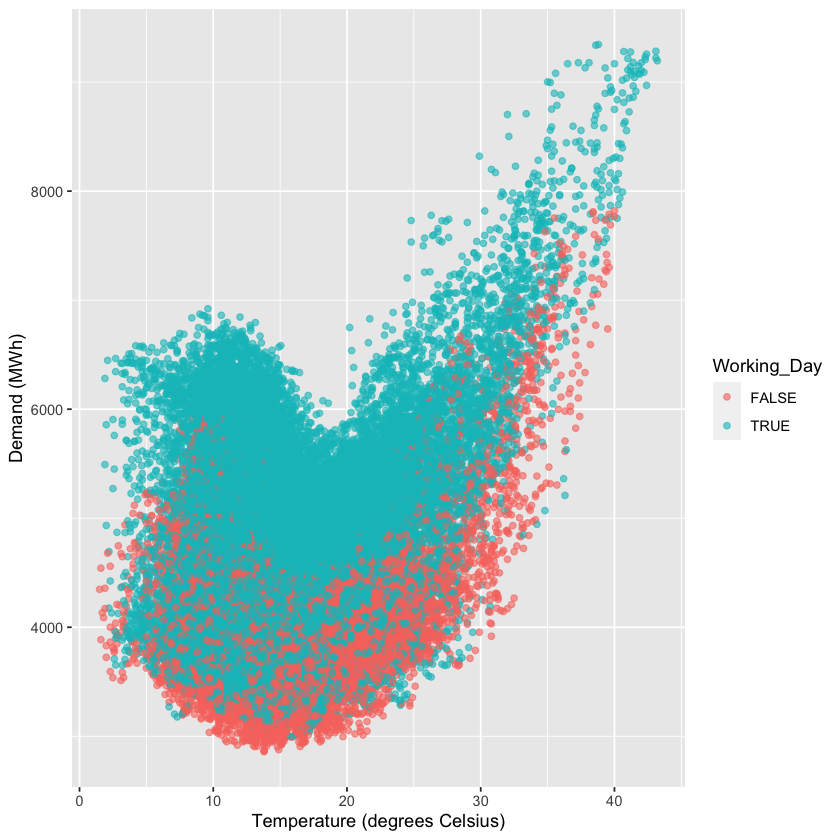

In [36]:
elec <- vic_elec %>%
  mutate(
    DOW = wday(Date, label = TRUE),
    Working_Day = !Holiday & !(DOW %in% c("Sat", "Sun")),
    Cooling = pmax(Temperature, 18)
  )
elec %>%
  ggplot(aes(x=Temperature, y=Demand, col=Working_Day)) +
  geom_point(alpha = 0.6) +
  labs(x="Temperature (degrees Celsius)", y="Demand (MWh)")

In [37]:
elec

Time                Demand   Temperature Date       Holiday DOW
1     2012-01-01 00:00:00 4382.825 21.40       2012-01-01 TRUE    Sun
2     2012-01-01 00:30:00 4263.366 21.05       2012-01-01 TRUE    Sun
3     2012-01-01 01:00:00 4048.966 20.70       2012-01-01 TRUE    Sun
4     2012-01-01 01:30:00 3877.563 20.55       2012-01-01 TRUE    Sun
5     2012-01-01 02:00:00 4036.230 20.40       2012-01-01 TRUE    Sun
6     2012-01-01 02:30:00 3865.597 20.25       2012-01-01 TRUE    Sun
7     2012-01-01 03:00:00 3694.098 20.10       2012-01-01 TRUE    Sun
8     2012-01-01 03:30:00 3561.624 19.60       2012-01-01 TRUE    Sun
9     2012-01-01 04:00:00 3433.035 19.10       2012-01-01 TRUE    Sun
10    2012-01-01 04:30:00 3359.468 18.95       2012-01-01 TRUE    Sun
11    2012-01-01 05:00:00 3331.343 18.80       2012-01-01 TRUE    Sun
12    2012-01-01 05:30:00 3304.641 18.65       2012-01-01 TRUE    Sun
13    2012-01-01 06:00:00 3272.106 18.50       2012-01-01 TRUE    Sun
14    2012-01-01 06:30:00 3275.998 18.85       2012-01-01 TRUE    Sun
15    2012-01-01 07:00:00 3370.424 19.20       2012-01-01 TRUE    Sun
16    2012-01-01 07:30:00 3494.418 20.10       2012-01-01 TRUE    Sun
17    2012-01-01 08:00:00 3580.091 21.00       2012-01-01 TRUE    Sun
18    2012-01-01 08:30:00 3719.985 22.55       2012-01-01 TRUE    Sun
19    2012-01-01 09:00:00 3909.301 24.10       2012-01-01 TRUE    Sun
20    2012-01-01 09:30:00 4092.566 25.20       2012-01-01 TRUE    Sun
21    2012-01-01 10:00:00 4245.025 26.30       2012-01-01 TRUE    Sun
22    2012-01-01 10:30:00 4413.075 27.70       2012-01-01 TRUE    Sun
23    2012-01-01 11:00:00 4599.507 29.10       2012-01-01 TRUE    Sun
24    2012-01-01 11:30:00 4772.134 30.20       2012-01-01 TRUE    Sun
25    2012-01-01 12:00:00 4938.796 31.30       2012-01-01 TRUE    Sun
26    2012-01-01 12:30:00 5080.138 32.00       2012-01-01 TRUE    Sun
27    2012-01-01 13:00:00 5211.915 32.70       2012-01-01 TRUE    Sun
28    2012-01-01 13:30:00 5328.317 32.65       2012-01-01 TRUE    Sun
29    2012-01-01 14:00:00 5436.420 32.60       2012-01-01 TRUE    Sun
30    2012-01-01 14:30:00 5538.357 32.00       2012-01-01 TRUE    Sun
⋮     ⋮                   ⋮        ⋮           ⋮          ⋮       ⋮  
52579 2014-12-31 09:00:00 4052.179 16.4        2014-12-31 FALSE   Wed
52580 2014-12-31 09:30:00 4066.397 16.8        2014-12-31 FALSE   Wed
52581 2014-12-31 10:00:00 4071.801 17.7        2014-12-31 FALSE   Wed
52582 2014-12-31 10:30:00 4066.879 18.4        2014-12-31 FALSE   Wed
52583 2014-12-31 11:00:00 4067.496 18.0        2014-12-31 FALSE   Wed
52584 2014-12-31 11:30:00 4053.198 18.8        2014-12-31 FALSE   Wed
52585 2014-12-31 12:00:00 4023.684 19.8        2014-12-31 FALSE   Wed
52586 2014-12-31 12:30:00 4000.520 20.1        2014-12-31 FALSE   Wed
52587 2014-12-31 13:00:00 3987.103 20.8        2014-12-31 FALSE   Wed
52588 2014-12-31 13:30:00 3993.987 20.8        2014-12-31 FALSE   Wed
52589 2014-12-31 14:00:00 4004.250 22.6        2014-12-31 FALSE   Wed
52590 2014-12-31 14:30:00 4024.025 22.6        2014-12-31 FALSE   Wed
52591 2014-12-31 15:00:00 4060.025 22.8        2014-12-31 FALSE   Wed
52592 2014-12-31 15:30:00 4109.994 22.8        2014-12-31 FALSE   Wed
52593 2014-12-31 16:00:00 4196.079 23.1        2014-12-31 FALSE   Wed
52594 2014-12-31 16:30:00 4294.099 23.4        2014-12-31 FALSE   Wed
52595 2014-12-31 17:00:00 4366.631 24.8        2014-12-31 FALSE   Wed
52596 2014-12-31 17:30:00 4388.486 25.5        2014-12-31 FALSE   Wed
52597 2014-12-31 18:00:00 4302.290 23.9        2014-12-31 FALSE   Wed
52598 2014-12-31 18:30:00 4244.466 23.4        2014-12-31 FALSE   Wed
52599 2014-12-31 19:00:00 4125.988 22.3        2014-12-31 FALSE   Wed
52600 2014-12-31 19:30:00 4013.263 20.9        2014-12-31 FALSE   Wed
52601 2014-12-31 20:00:00 3924.593 20.3        2014-12-31 FALSE   Wed
52602 2014-12-31 20:30:00 3893.868 20.3        2014-12-31 FALSE   Wed
52603 2014-12-31 21:00:00 3927.753 20.3        2014-12-31 FALSE   Wed
52604 2014-12-31

In [39]:
fit<- elec %>%
 model(
 ARIMA(Demand ~ PDQ(0,0,0)+pdq(d=0)+ Temperature+Cooling+ Working_day+
       fourier(period="day" ,K=10)+ 
       fourier(period="week",K=5)+ 
       fourier(period="year",K=3) 
       )
      )

Warning message:
“1 error encountered for ARIMA(Demand ~ PDQ(0, 0, 0) + pdq(d = 0) + Temperature + Cooling + 
    Working_day + fourier(period = "day", K = 10) + fourier(period = "week", 
    K = 5) + fourier(period = "year", K = 3))
[1] object 'Working_day' not found
”


In [44]:
elec_newdata <- new_data(elec, 2*48) %>%
  mutate(
    Temperature = tail(elec$Temperature, 2 * 48),
    Date = lubridate::as_date(Time),
    DOW = wday(Date, label = TRUE),
    Working_Day = (Date != "2015-01-01") &
                   !(DOW %in% c("Sat", "Sun")),
    Cooling = pmax(Temperature, 18)
  )
fc <- fit %>%
  forecast(new_data = elec_newdata)

In [41]:
fc

.model                                                                                                                                                                                           
1  ARIMA(Demand ~ PDQ(0, 0, 0) + pdq(d = 0) + Temperature + Cooling + \n    Working_day + fourier(period = "day", K = 10) + fourier(period = "week", \n    K = 5) + fourier(period = "year", K = 3))
2  ARIMA(Demand ~ PDQ(0, 0, 0) + pdq(d = 0) + Temperature + Cooling + \n    Working_day + fourier(period = "day", K = 10) + fourier(period = "week", \n    K = 5) + fourier(period = "year", K = 3))
3  ARIMA(Demand ~ PDQ(0, 0, 0) + pdq(d = 0) + Temperature + Cooling + \n    Working_day + fourier(period = "day", K = 10) + fourier(period = "week", \n    K = 5) + fourier(period = "year", K = 3))
4  ARIMA(Demand ~ PDQ(0, 0, 0) + pdq(d = 0) + Temperature + Cooling + \n    Working_day + fourier(period = "day", K = 10) + fourier(period = "week", \n    K = 5) + fourier(period = "year", K = 3))
5  ARIMA(Demand ~ PDQ(0, 0, 0) + pdq(d = 0) + Temperature + Cooling + \n    Working_day + fourier(period = "day", K = 10) + fourier(period = "week", \n    K = 5) + fourier(period = "year", K = 3))
6  ARIMA(Demand ~ PDQ(0, 0, 0) + pdq(d = 0) + Temperature + Cooling + \n    Working_day + fourier(period = "day", K = 10) + fourier(period = "week", \n    K = 5) + fourier(period = "year", K = 3))
7  ARIMA(Demand ~ PDQ(0, 0, 0) + pdq(d = 0) + Temperature + Cooling + \n    Working_day + fourier(period = "day", K = 10) + fourier(period = "week", \n    K = 5) + fourier(period = "year", K = 3))
8  ARIMA(Demand ~ PDQ(0, 0, 0) + pdq(d = 0) + Temperature + Cooling + \n    Working_day + fourier(period = "day", K = 10) + fourier(period = "week", \n    K = 5) + fourier(period = "year", K = 3))
9  ARIMA(Demand ~ PDQ(0, 0, 0) + pdq(d = 0) + Temperature + Cooling + \n    Working_day + fourier(period = "day", K = 10) + fourier(period = "week", \n    K = 5) + fourier(period = "year", K = 3))
10 ARIMA(Demand ~ PDQ(0, 0, 0) + pdq(d = 0) + Temperature + Cooling + \n    Working_day + fourier(period = "day", K = 10) + fourier(period = "week", \n    K = 5) + fourier(period = "year", K = 3))
11 ARIMA(Demand ~ PDQ(0, 0, 0) + pdq(d = 0) + Temperature + Cooling + \n    Working_day + fourier(period = "day", K = 10) + fourier(period = "week", \n    K = 5) + fourier(period = "year", K = 3))
12 ARIMA(Demand ~ PDQ(0, 0, 0) + pdq(d = 0) + Temperature + Cooling + \n    Working_day + fourier(period = "day", K = 10) + fourier(period = "week", \n    K = 5) + fourier(period = "year", K = 3))
13 ARIMA(Demand ~ PDQ(0, 0, 0) + pdq(d = 0) + Temperature + Cooling + \n    Working_day + fourier(period = "day", K = 10) + fourier(period = "week", \n    K = 5) + fourier(period = "year", K = 3))
14 ARIMA(Demand ~ PDQ(0, 0, 0) + pdq(d = 0) + Temperature + Cooling + \n    Working_day + fourier(period = "day", K = 10) + fourier(period = "week", \n    K = 5) + fourier(period = "year", K = 3))
15 ARIMA(Demand ~ PDQ(0, 0, 0) + pdq(d = 0) + Temperature + Cooling + \n    Working_day + fourier(period = "day", K = 10) + fourier(period = "week", \n    K = 5) + fourier(period = "year", K = 3))
16 ARIMA(Demand ~ PDQ(0, 0, 0) + pdq(d = 0) + Temperature + Cooling + \n    Working_day + fourier(period = "day", K = 10) + fourier(period = "week", \n    K = 5) + fourier(period = "year", K = 3))
17 ARIMA(Demand ~ PDQ(0, 0, 0) + pdq(d = 0) + Temperature + Cooling + \n    Working_day + fourier(period = "day", K = 10) + fourier(period = "week", \n    K = 5) + fourier(period = "year", K = 3))
18 ARIMA(Demand ~ PDQ(0, 0, 0) + pdq(d = 0) + Temperature + Cooling + \n    Working_day + fourier(period = "day", K = 10) + fourier(period = "week", \n    K = 5) + fourier(period = "year", K = 3))
19 ARIMA(Demand ~ PDQ(0, 0, 0) + pdq(d = 0) + Temperature + Cooling + \n    Working_day + fourier(period = "day", K = 10) + fourier(period = "week", \n    K = 5) + fourier(period = "year", K = 3))
20 ARIMA(Demand ~ PDQ(0, 0, 0) + pdq(d = 0) + Temperature + Coo

Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Removed 96 row(s) containing missing values (geom_path).”


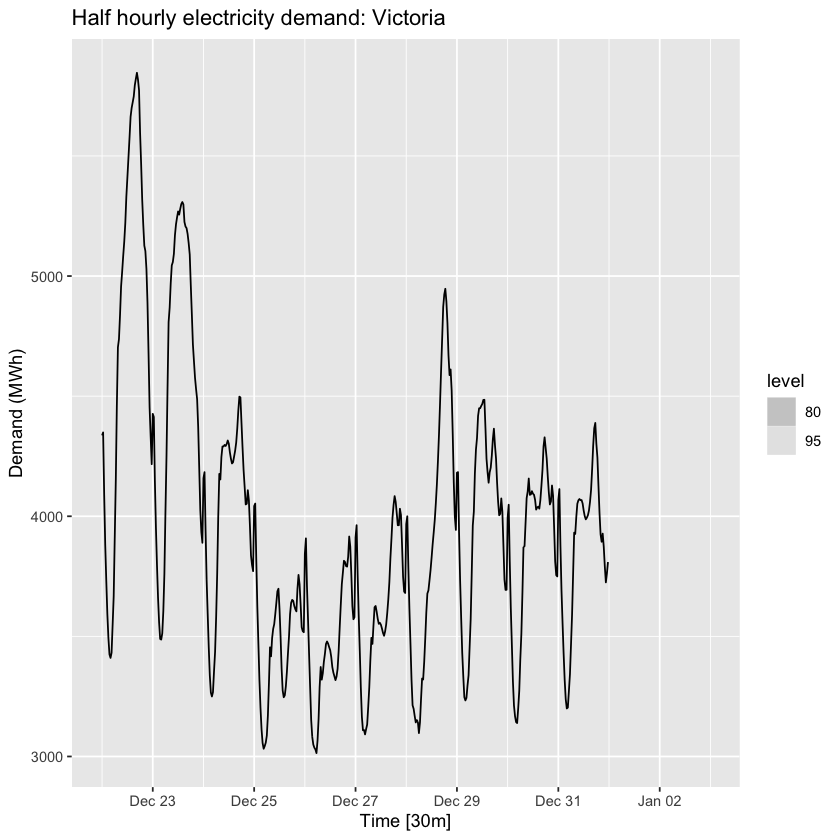

In [42]:
fc %>%
  autoplot(elec %>% tail(10 * 48)) +
  labs(title="Half hourly electricity demand: Victoria",
       y = "Demand (MWh)", x = "Time [30m]")

Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Removed 96 row(s) containing missing values (geom_path).”


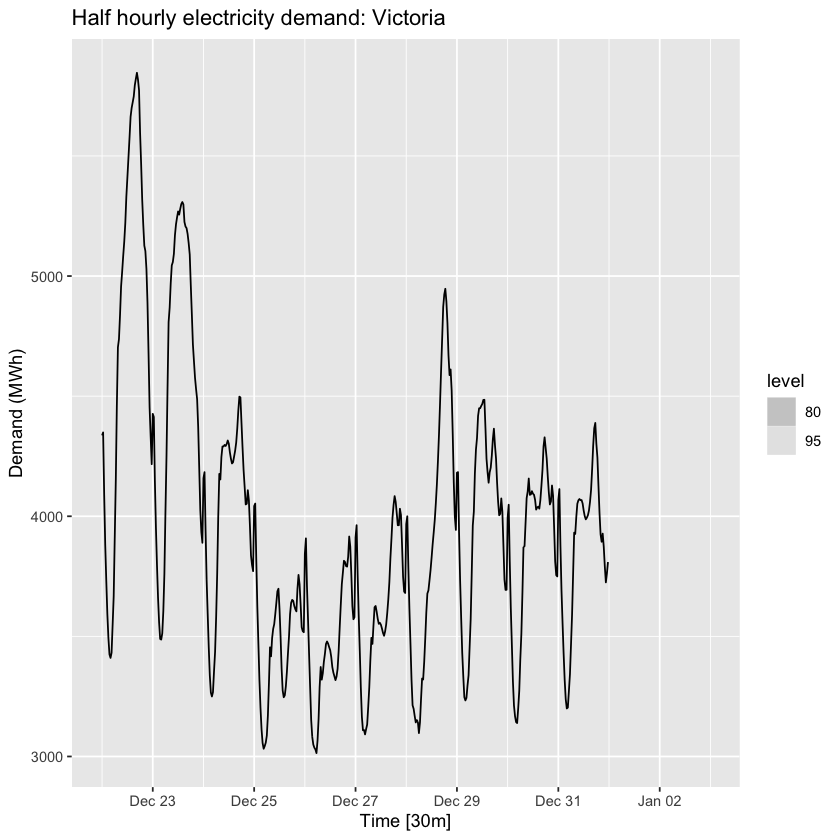

In [48]:
elec_newdata <- new_data(elec, 2*48) %>%
  mutate(
    Temperature = tail(elec$Temperature, 2 * 48),
    Date = lubridate::as_date(Time),
    DOW = wday(Date, label = TRUE),
    Working_Day = (Date != "2015-01-01") &
                   !(DOW %in% c("Sat", "Sun")),
    Cooling = pmax(Temperature, 18)
  )
fc <- fit %>%
  forecast(new_data = elec_newdata)

fc %>%
  autoplot(elec %>% tail(10 * 48)) +
  labs(title="Half hourly electricity demand: Victoria",
       y = "Demand (MWh)", x = "Time [30m]")

ERROR: Error in na.contiguous.default(as.ts(x)): all times contain an NA


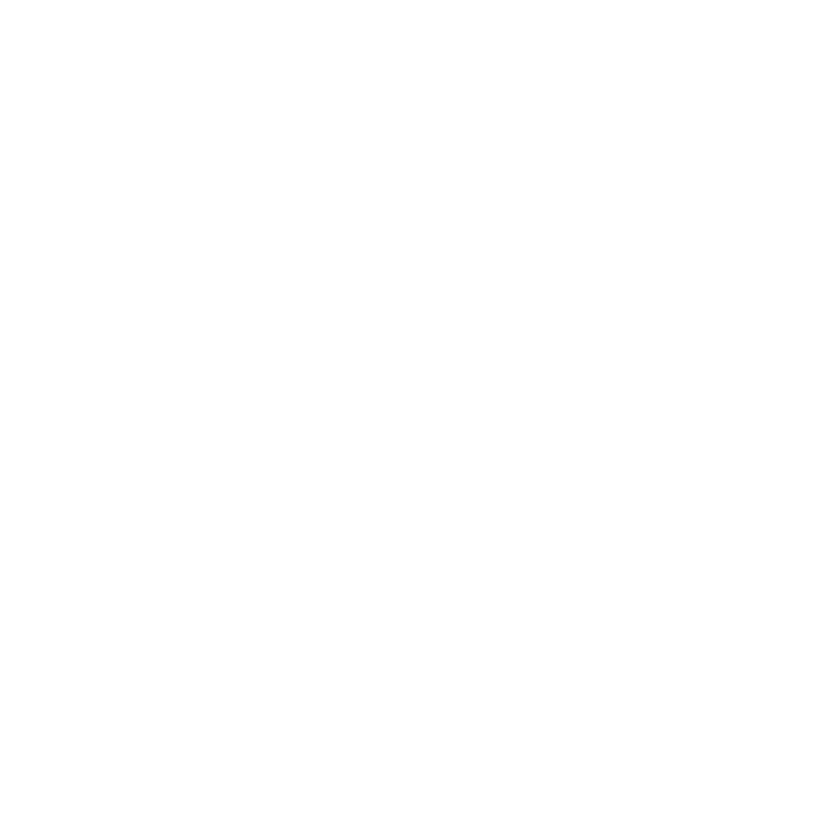

In [50]:
fit %>% gg_tsresiduals()

# 12.2 Prophet model
- originally for forecasting daily data with weekly and yearly seasonality, plus holiday effects. 
- It was later extended to cover more types of seasonal data. It works best with time series that have strong seasonality and several seasons of historical data.

# Example: Quarterly cement production
- we compared an ARIMA and ETS model, but we will add in a prophet model for comparison.

In [53]:
install.packages('fable.prophet')
library(fable.prophet)


also installing the dependencies ‘checkmate’, ‘matrixStats’, ‘inline’, ‘gridExtra’, ‘loo’, ‘pkgbuild’, ‘V8’, ‘dygraphs’, ‘extraDistr’, ‘RcppParallel’, ‘rstan’, ‘rstantools’, ‘StanHeaders’, ‘RcppEigen’, ‘prophet’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: Rcpp



In [58]:
cement <- aus_production %>%
  filter(year(Quarter) >= 1988)
train <- cement %>%
  filter(year(Quarter) <= 2007)
fit <- train

In [59]:
fit <- train %>%
 model(
  arima = ARIMA(Cement),
  ets   = ETS(Cement),
  prophet=prophet(Cement ~ season(period=4,order =2,type="multiplicative" ))   
      )

- Note that the seasonal term must have the period fully specified for quarterly and monthly data, as the default values assume the data are observed at least daily.

In [60]:
fit

arima                             ets          prophet  
1 <ARIMA(1,0,1)(2,1,1)[4] w/ drift> <ETS(M,N,M)> <prophet>

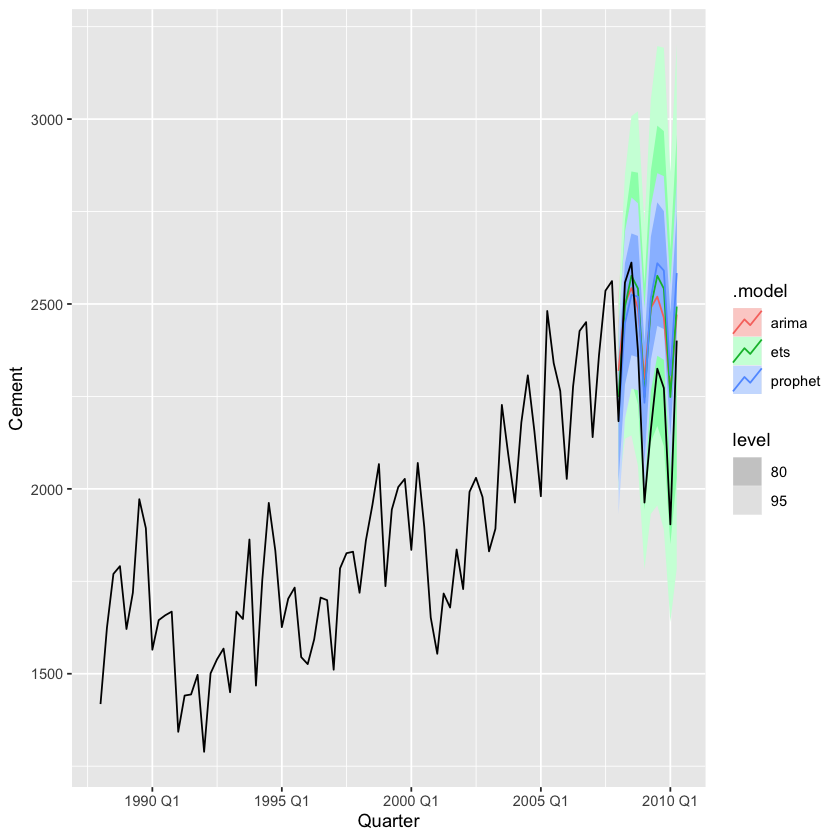

In [62]:
fc<-fit %>% forecast(h="2 years 6 months")
fc %>% autoplot(cement)

In [63]:
fc %>% accuracy(cement)

.model  .type ME        RMSE     MAE      MPE       MAPE     MASE    
1 arima   Test  -160.5363 216.4332 185.5033 -7.711827 8.676720 1.267373
2 ets     Test  -170.8256 222.0420 190.9648 -8.070537 8.852066 1.304686
3 prophet Test  -176.7281 248.8968 216.2010 -8.395106 9.924061 1.477101
  RMSSE    ACF1     
1 1.258787 0.3870161
2 1.291409 0.5793787
3 1.447597 0.7012566

- In this example, the Prophet forecasts are worse than either the ETS or ARIMA forecasts.

# Example: Half-hourly electricity demand


In [64]:
#Before:
#fit<- elec %>%
# model(
# ARIMA(Demand ~ PDQ(0,0,0)+pdq(d=0)+ Temperature+Cooling+ Working_day+
#       fourier(period="day" ,K=10)+ 
#       fourier(period="week",K=5)+ 
#       fourier(period="year",K=3) 
#       )
#      )

In [65]:
fit <- elec %>%
  model(
    prophet(Demand ~ Temperature + Cooling + Working_Day +
            season(period = "day", order = 10) +
            season(period = "week", order = 5) +
            season(period = "year", order = 3))
  )

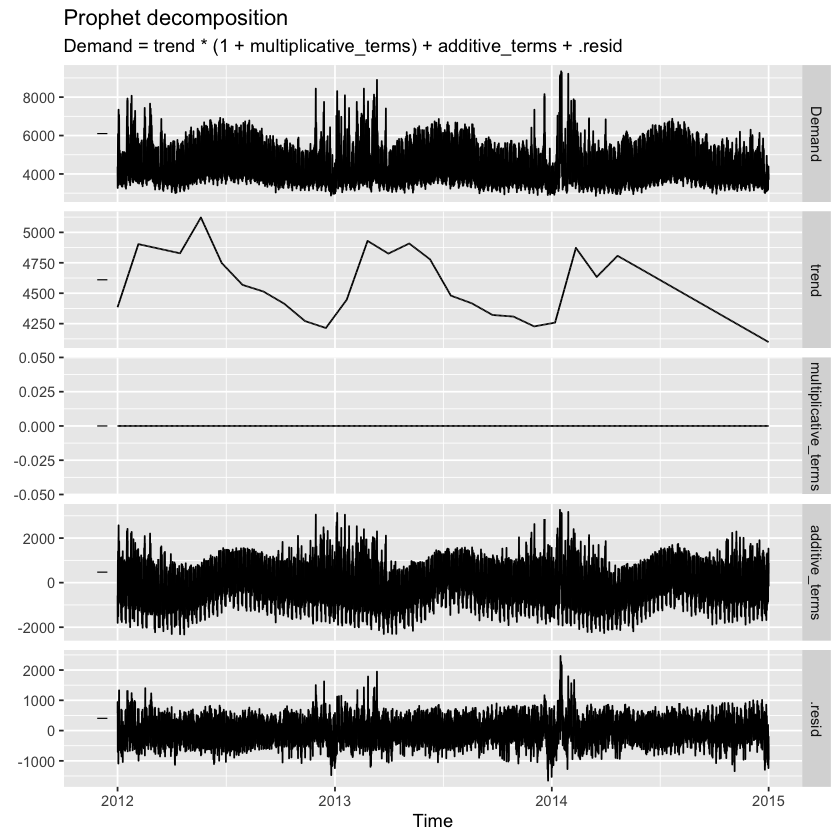

In [66]:
fit %>%
 components() %>%
 autoplot()

- The model specification is very similar to the DHR model in the previous section, although the result is different in several important ways. The Prophet model adds a piecewise linear time trend which is not really appropriate here as we don’t expect the long term forecasts to continue to follow the downward linear trend at the end of the series.

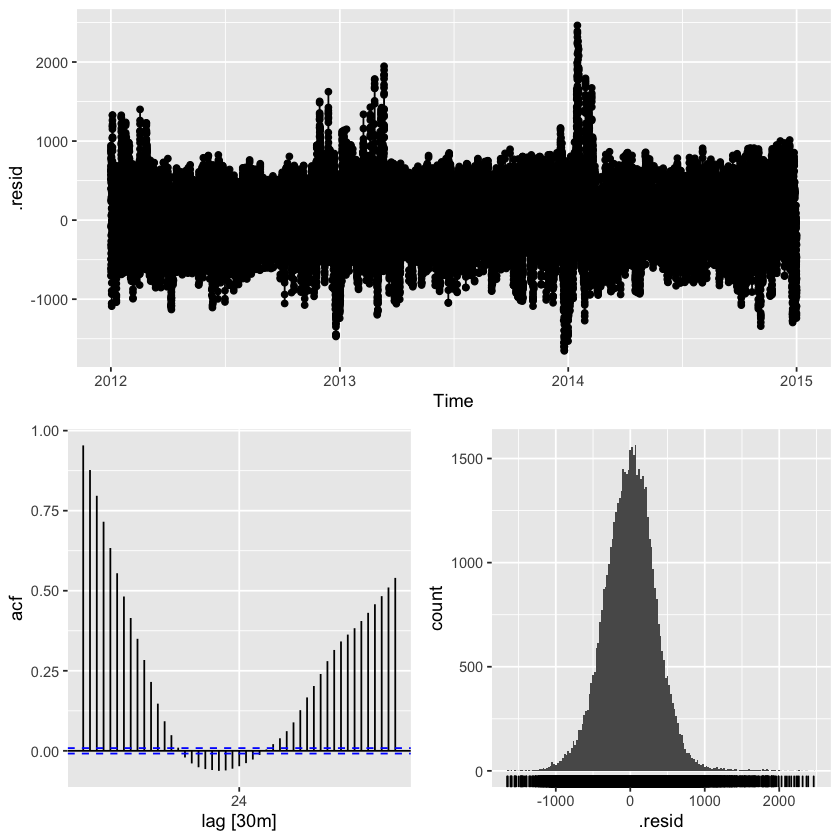

In [67]:
fit %>% gg_tsresiduals()

- There is also substantial remaining autocorrelation in the residuals,

In [68]:
fc <- fit %>%
  forecast(new_data = elec_newdata)

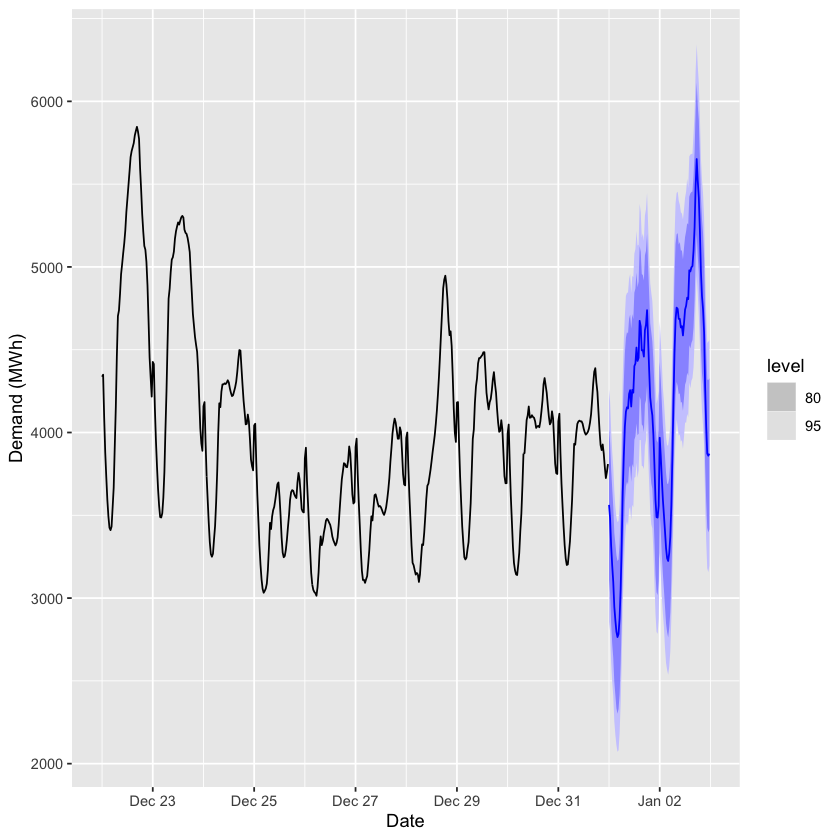

In [69]:
fc %>%
  autoplot(elec %>% tail(10 * 48)) +
  labs(x = "Date", y = "Demand (MWh)")

- Prophet has the advantage of being much faster to estimate than the DHR models we have considered previously, and it is completely automated. However, it rarely gives better forecast accuracy than the alternative approaches, as these two examples have illustrated.

# 12.3 Vector autoregressions


# Example: A VAR model for forecasting US consumption

In [70]:
fit <- us_change %>%
  model(
    aicc = VAR(vars(Consumption, Income)),
    bic = VAR(vars(Consumption, Income), ic = "bic")
  )
fit

aicc             bic             
1 <VAR(5) w/ mean> <VAR(1) w/ mean>

In [71]:
glance(fit)

.model sigma2                                     log_lik   AIC      AICc    
1 aicc   0.3195267, 0.1391537, 0.1391537, 0.6354455 -372.8583 797.7166 806.1744
2 bic    0.3601181, 0.1969693, 0.1969693, 0.7250800 -407.9293 835.8586 837.0414
  BIC     
1 882.5465
2 868.6907

- A VAR(5) model is selected using the AICc (the default), while a VAR(1) model is selected using the BIC.
- This is not unusual — the BIC will always select a model that has fewer parameters than the AICc model as it imposes a stronger penalty for the number of parameters.

In [72]:
fit %>%
augment()

.model Quarter .response   value       .fitted     .resid       
1   aicc   1970 Q1 Consumption  0.61856640          NA            NA
2   aicc   1970 Q2 Consumption  0.45198402          NA            NA
3   aicc   1970 Q3 Consumption  0.87287178          NA            NA
4   aicc   1970 Q4 Consumption -0.27184793          NA            NA
5   aicc   1971 Q1 Consumption  1.90134496          NA            NA
6   aicc   1971 Q2 Consumption  0.91487735  0.91478148  9.586788e-05
7   aicc   1971 Q3 Consumption  0.79410964  0.67918572  1.149239e-01
8   aicc   1971 Q4 Consumption  1.64563316  1.11654336  5.290898e-01
9   aicc   1972 Q1 Consumption  1.31118969  0.96131756  3.498721e-01
10  aicc   1972 Q2 Consumption  1.88577788  0.81264499  1.073133e+00
11  aicc   1972 Q3 Consumption  1.52933361  1.31855935  2.107743e-01
12  aicc   1972 Q4 Consumption  2.31955754  1.33477858  9.847790e-01
13  aicc   1973 Q1 Consumption  1.80928217  1.78500969  2.427247e-02
14  aicc   1973 Q2 Consumption -0.04509061  1.29360037 -1.338691e+00
15  aicc   1973 Q3 Consumption  0.35135318  0.97501669 -6.236635e-01
16  aicc   1973 Q4 Consumption -0.29869339  0.44753573 -7.462291e-01
17  aicc   1974 Q1 Consumption -0.89869876  0.03448980 -9.331886e-01
18  aicc   1974 Q2 Consumption  0.35940645 -0.15934936  5.187558e-01
19  aicc   1974 Q3 Consumption  0.42864101 -0.02016405  4.488051e-01
20  aicc   1974 Q4 Consumption -1.47250253  0.18141299 -1.653916e+00
21  aicc   1975 Q1 Consumption  0.83524738  0.38818010  4.470673e-01
22  aicc   1975 Q2 Consumption  1.63148743  0.54914133  1.082346e+00
23  aicc   1975 Q3 Consumption  1.41124035  0.86305192  5.481884e-01
24  aicc   1975 Q4 Consumption  1.06959158  0.95135469  1.182369e-01
25  aicc   1976 Q1 Consumption  1.97965950  1.30229992  6.773596e-01
26  aicc   1976 Q2 Consumption  0.91584535  1.06956709 -1.537217e-01
27  aicc   1976 Q3 Consumption  1.04735216  0.98923839  5.811378e-02
28  aicc   1976 Q4 Consumption  1.28914016  1.24047346  4.866670e-02
29  aicc   1977 Q1 Consumption  1.17179885  0.84904053  3.227583e-01
30  aicc   1977 Q2 Consumption  0.54078143  0.87212851 -3.313471e-01
⋮   ⋮      ⋮       ⋮           ⋮           ⋮           ⋮            
763 bic    2012 Q1 Income       1.8546191  0.55979992   1.29481916  
764 bic    2012 Q2 Income       0.9050116  0.46570746   0.43930412  
765 bic    2012 Q3 Income      -0.7184021  0.38980251  -1.10820458  
766 bic    2012 Q4 Income       2.7326089  0.81520213   1.91740680  
767 bic    2013 Q1 Income      -4.0844195  0.06612954  -4.15054907  
768 bic    2013 Q2 Income       0.7422486  1.85638975  -1.11414116  
769 bic    2013 Q3 Income       0.4314045  0.39417856   0.03722591  
770 bic    2013 Q4 Income       0.3943067  0.63852553  -0.24421885  
771 bic    2014 Q1 Income       1.3833211  0.87047024   0.51285090  
772 bic    2014 Q2 Income       1.3529276  0.38707597   0.96585160  
773 bic    2014 Q3 Income       1.1605783  0.73718948   0.42338878  
774 bic    2014 Q4 Income       1.3130115  0.77754681   0.53546469  
775 bic    2015 Q1 Income       1.1292929  0.80476725   0.32452569  
776 bic    2015 Q2 Income       0.7495874  0.66605781   0.08352956  
777 bic    2015 Q3 Income       0.7323707  0.74690677  -0.01453611  
778 bic    2015 Q4 Income       0.3167496  0.73491781  -0.41816825  
779 bic    2016 Q1 Income       0.6661374  0.68818700  -0.02204963  
780 bic    2016 Q2 Income      -0.1065885  0.76123874  -0.86782723  
781 bic    2016 Q3 Income       0.4472701  0.92943925  -0.48216914  
782 bic    2016 Q4 Income       0.5980377  0.74709805  -0.14906034  
783 bic    2017 Q1 Income       1.1920316  0.70021267   0.49181891  
784 bic    2017 Q2 Income       0.6648103  0.53482011   0.12999020  
785 bic    2017 Q3 Income       0.5797157  0.67052332  -0.09080757  
786 bic    2017 Q4 Income       0.9072104  0.68830076   0.21890964  
787 bic    2018 Q1 Income       1.6657258  0.87372965   0.79199611  
788 bic    2018 Q2 Income       0.6618253  0.32604955   0.33577579  
78

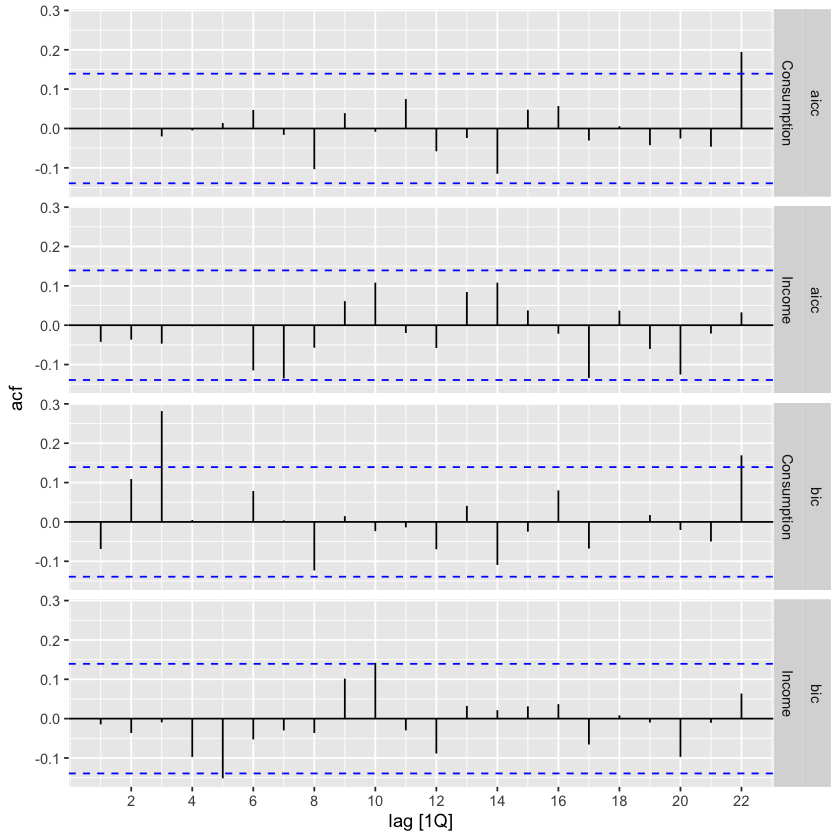

In [74]:
fit %>%
augment()%>%
ACF(.innov)%>%
autoplot()

- We see that the residuals from the VAR(1) model (bic) have significant autocorrelation for Consumption, while the VAR(5) model has effectively captured all the information in the data.

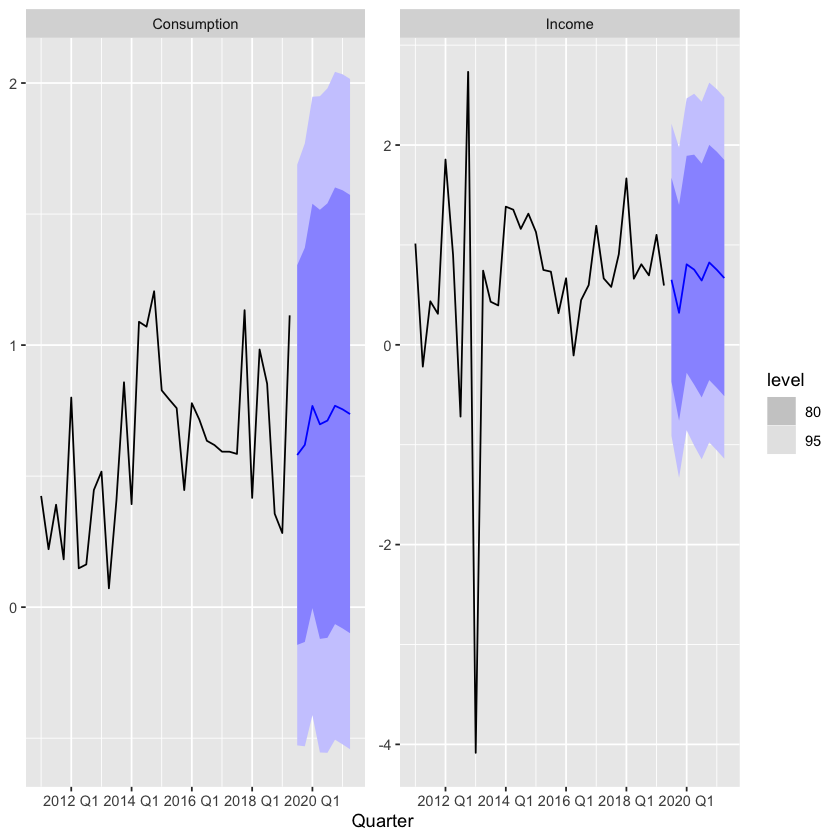

In [76]:
fit %>%
select(aicc) %>%
forecast() %>%
autoplot(us_change %>%filter(year(Quarter)>2010))

# 12.4 Neural network models


# Neural network autoregression
- With time series data, lagged values of the time series can be used as inputs to a neural network, just as we used lagged values in a linear autoregression model 
- We call this a neural network autoregression or NNAR model.
- In this book, we only consider feed-forward networks with one hidden layer, and we use the notation NNAR$(p,k)$ to indicate there are  $p$ lagged inputs and  $k$ nodes in the hidden layer.

# Example: Sunspots
- telecommunication companies like to predict sunspot activity in order to plan for any future difficulties.
- unspots follow a cycle of length between 9 and 14 years.


In [78]:
sunspots <- sunspot.year %>% as_tsibble()
sunspots

index value
1   1700    5  
2   1701   11  
3   1702   16  
4   1703   23  
5   1704   36  
6   1705   58  
7   1706   29  
8   1707   20  
9   1708   10  
10  1709    8  
11  1710    3  
12  1711    0  
13  1712    0  
14  1713    2  
15  1714   11  
16  1715   27  
17  1716   47  
18  1717   63  
19  1718   60  
20  1719   39  
21  1720   28  
22  1721   26  
23  1722   22  
24  1723   11  
25  1724   21  
26  1725   40  
27  1726   78  
28  1727  122  
29  1728  103  
30  1729   73  
⋮   ⋮     ⋮    
260 1959  159.0
261 1960  112.3
262 1961   53.9
263 1962   37.5
264 1963   27.9
265 1964   10.2
266 1965   15.1
267 1966   47.0
268 1967   93.8
269 1968  105.9
270 1969  105.5
271 1970  104.5
272 1971   66.6
273 1972   68.9
274 1973   38.0
275 1974   34.5
276 1975   15.5
277 1976   12.6
278 1977   27.5
279 1978   92.5
280 1979  155.4
281 1980  154.7
282 1981  140.5
283 1982  115.9
284 1983   66.6
285 1984   45.9
286 1985   17.9
287 1986   13.4
288 1987   29.2
289 1988  100.2

In [80]:
sunspots %>%
  model(NNETAR(sqrt(value))) 

NNETAR(sqrt(value))
1 <NNAR(9,5)>

- the last 9 observations are used as predictors, and there are 5 neurons in the hidden layer

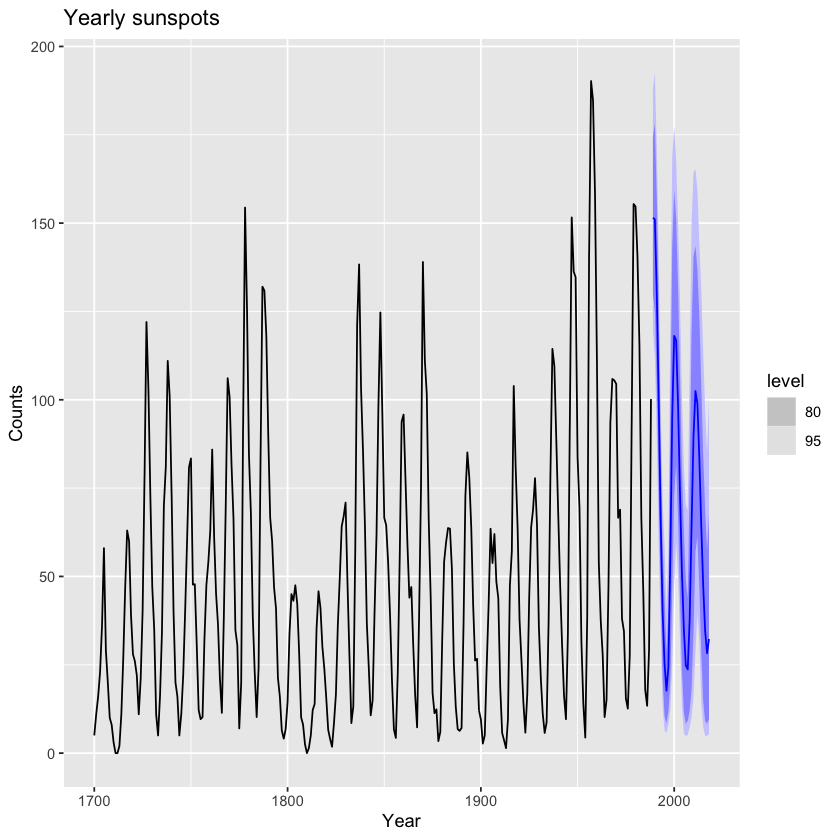

In [79]:
sunspots %>%
  model(NNETAR(sqrt(value))) %>%
  forecast(h = 30) %>%
  autoplot(sunspots) +
  labs(x = "Year", y = "Counts",
       title = "Yearly sunspots")

- When it comes to forecasting, the network is applied iteratively.
- For forecasting one step ahead, we simply use the available historical inputs. 
- For forecasting two steps ahead, we use the one-step forecast as an input, along with the historical data. This process proceeds until we have computed all the required forecasts.

# Prediction intervals
Unlike most of the methods considered in this book, neural networks are not based on a well-defined stochastic model, and so it is not straightforward to derive prediction intervals for the resultant forecasts. However, we can still compute prediction intervals using simulation where future sample paths are generated using bootstrapped residuals.
- we can simulate future sample paths of this model iteratively, by randomly generating a value for  
$\epsilon_t$:
 - either from a normal distribution, 
 - or by resampling from the historical values.
- we can iteratively simulate a future sample path. By repeatedly simulating sample paths, we build up knowledge of the distribution for all future values based on the fitted neural network.

Here is a simulation of 9 possible future sample paths for the sunspot data. Each sample path covers the next 30 years after the observed data.

In [90]:
fit <- sunspots %>%
  model(NNETAR(sqrt(value)))


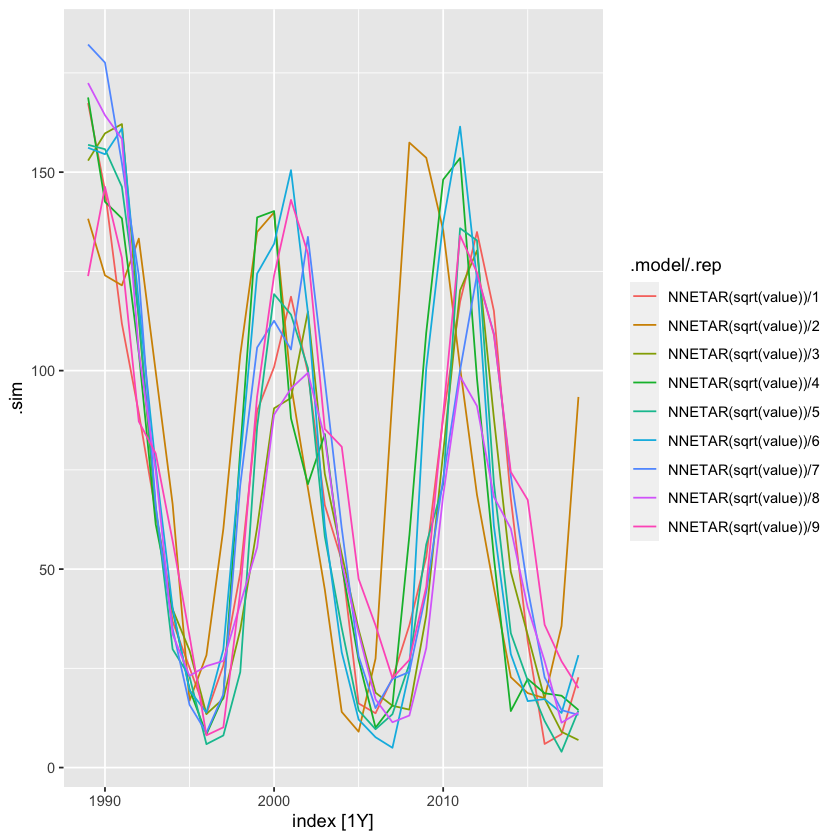

In [92]:
fit %>% 
generate(times=9, h=30) %>%
autoplot(.sim)

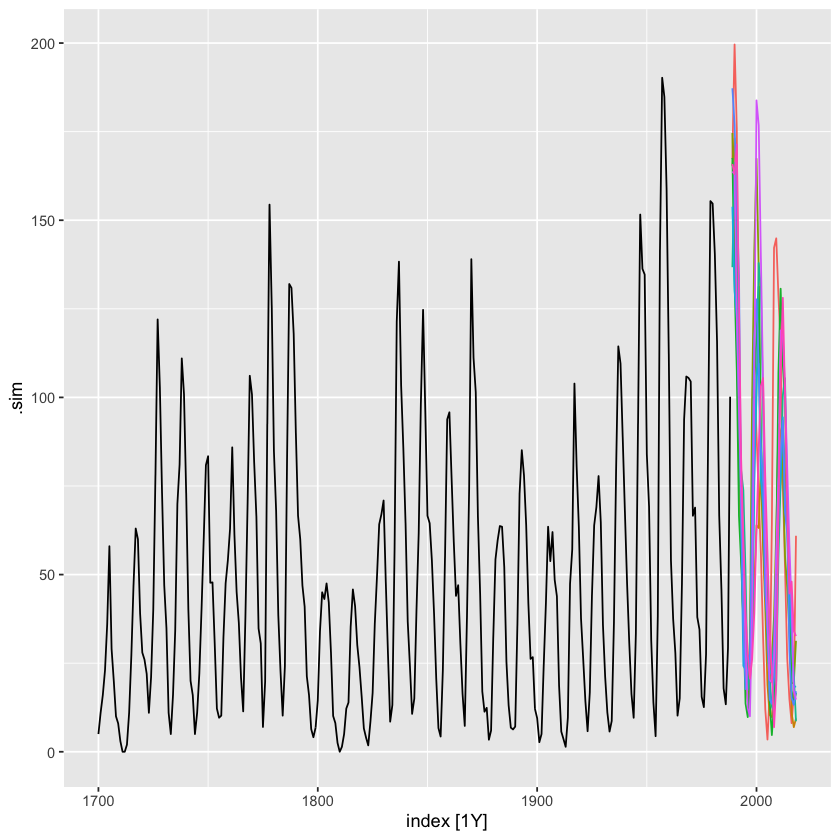

In [93]:
fit %>%
  generate(times = 9, h = 30) %>%
  autoplot(.sim) +
  autolayer(sunspots, value) +
  theme(legend.position = "none")

- If we do this many times, we can get a good picture of the forecast distributions. 
- This is how the forecast() function produces prediction intervals for NNAR models. 
- The times argument in forecast() controls how many simulations are done (default 1000). 
- By default, the errors are drawn from a normal distribution.
- The bootstrap argument allows the errors to be “bootstrapped” (i.e., randomly drawn from the historical errors)

# 12.5 Bootstrapping and bagging


## Bootstrapping time series
- First, the time series is transformed if necessary, and
- then decomposed into trend, seasonal and remainder components using STL.
- Then we obtain shuffled versions of the remainder component to get bootstrapped remainder series. 
- Because there may be autocorrelation present in an STL remainder series, we cannot simply use the re-draw procedure.
- Instead, we use a “blocked bootstrap,” where contiguous sections of the time series are selected at random and joined together.
- These bootstrapped remainder series are added to the trend and seasonal components, and the transformation is reversed to give variations on the original time series.

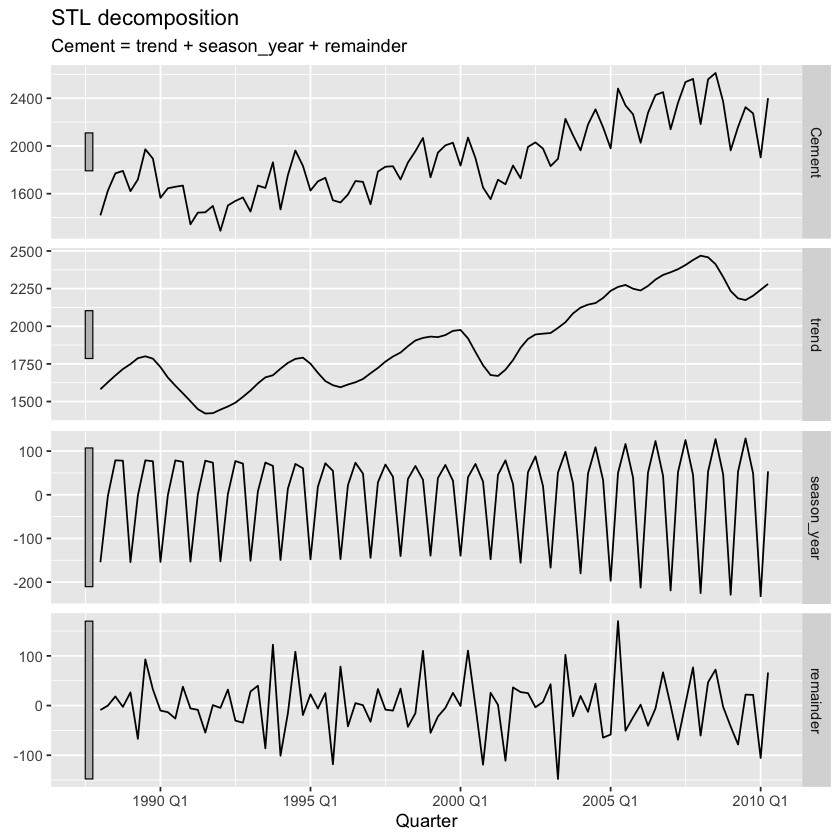

In [95]:
cement <- aus_production %>%
  filter(year(Quarter) >= 1988) %>%
  select(Quarter, Cement)
cement_stl <- cement %>%
  model(stl = STL(Cement))
cement_stl %>%
  components() %>%
  autoplot()

- Now we can generate several bootstrapped versions of the data. 
- Usually, generate() produces simulations of the future from a model. 
- But here we want simulations for the period of the historical data.
- So we use the new_data argument to pass in the original data so that the same time periods are used for the simulated data. 
- We will use a block size of 8 to cover two years of data.

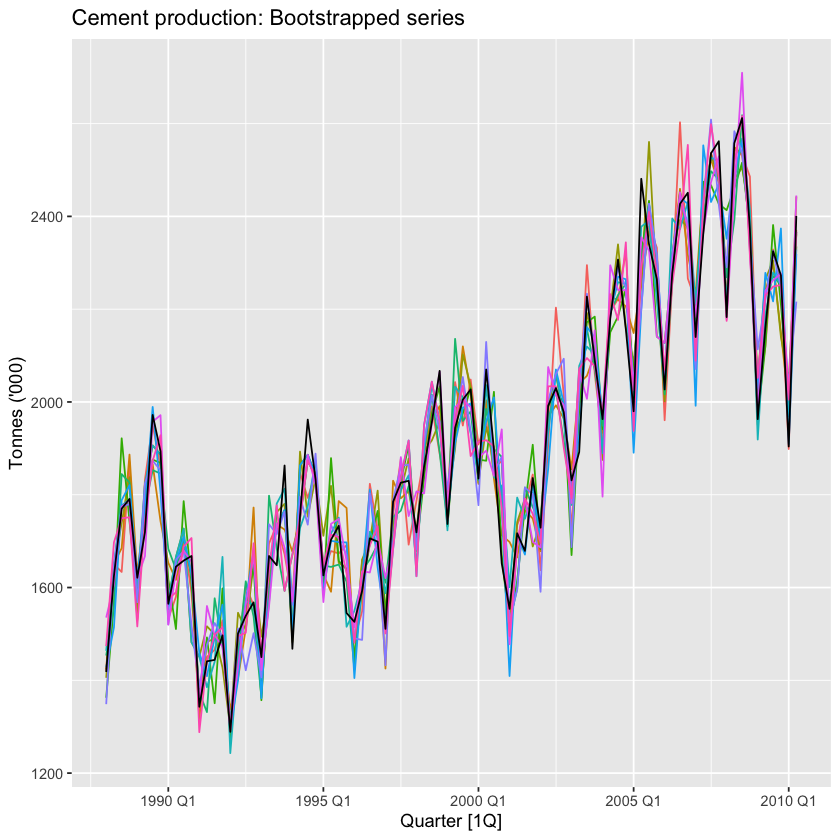

In [96]:
cement_stl %>%
 generate(new_data=cement, times=10, bootstrap_block_size=8) %>%
 autoplot(.sim)+
 autolayer(cement,Cement)+
 guides(colour = "none") +
  labs(title = "Cement production: Bootstrapped series",
       y="Tonnes ('000)")


- Ten bootstrapped versions of quarterly Australian cement production (coloured), along with the original data (black

# Bagged forecasts

- One use for these bootstrapped time series is to improve forecast accuracy. 
- If we produce forecasts from each of the additional time series, and average the resulting forecasts, we get better forecasts than if we simply forecast the original time series directly.
- This is called “bagging” which stands for “bootstrap aggregating.”

In [98]:
cement_stl

stl  
1 <STL>

- First, we simulate many time series that are similar to the original data, using the block-bootstrap:

In [104]:
sim <- cement_stl %>%
 generate(new_data=cement,times =100,bootstrap_block_size=8 ) %>%
 select(-.model, -Cement)

- For each of these series, we fit an ETS model. A different ETS model may be selected in each case, although it will most likely select the same model because the series are similar. However, the estimated parameters will be different, so the forecasts will be different even if the selected model is the same. This is a time-consuming process as there are a large number of series

In [106]:
ets_forecasts <-sim %>%
model(ets=ETS(.sim))%>%
forecast(h=12)

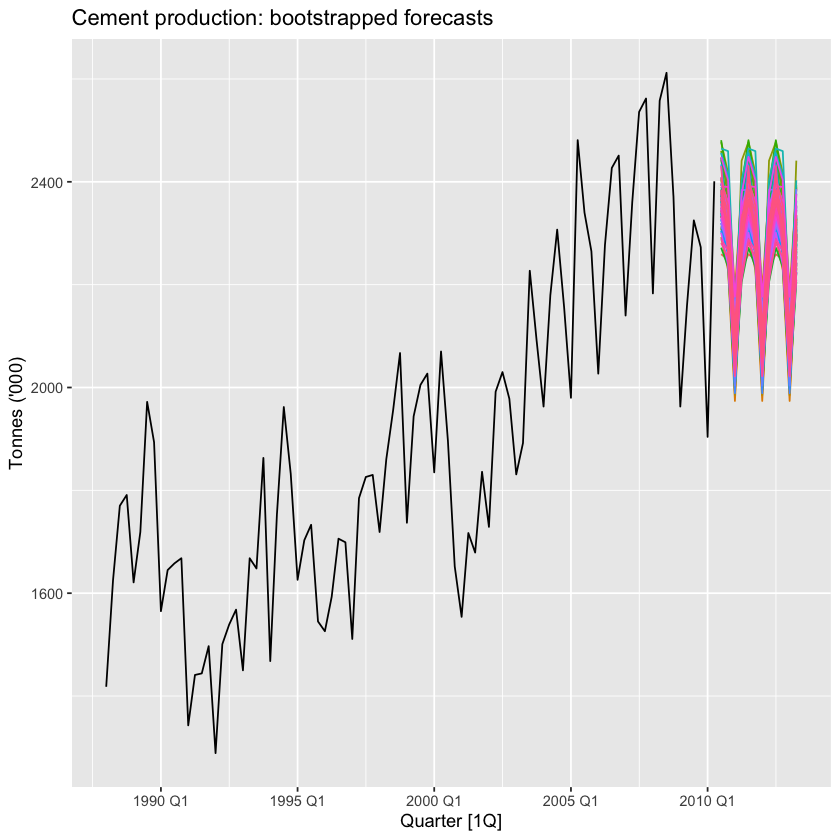

In [108]:
ets_forecasts %>%
 update_tsibble(key=.rep)%>%
 autoplot(.mean)+
 autolayer(cement,Cement)+
  guides(col = FALSE) +
  labs(title = "Cement production: bootstrapped forecasts",
       y="Tonnes ('000)")

- Forecasts of 100 bootstrapped series obtained using ETS models.

Finally, we average these forecasts for each time period to obtained the “bagged forecasts” for the original data:

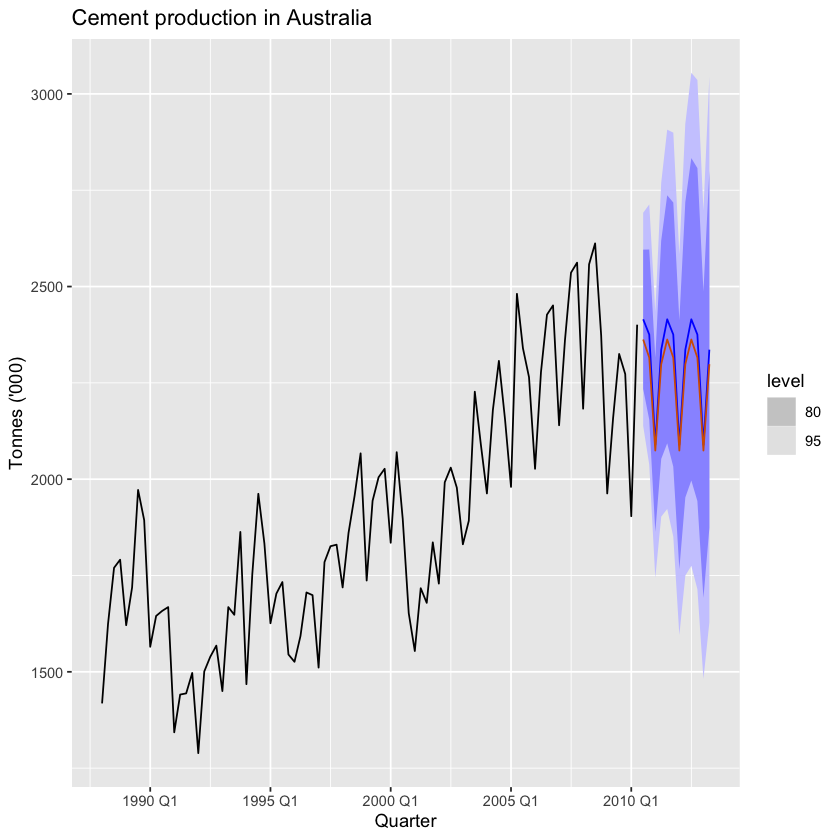

In [109]:
bagged <-ets_forecasts %>%
 summarise(bagged_mean=mean(.mean))
cement %>%
 model(ets=ETS(Cement)) %>%
 forecast(h=12) %>%
 autoplot(cement)+
 autolayer(bagged,bagged_mean,col="#D55E00")+
  labs(title = "Cement production in Australia",
       y="Tonnes ('000)")


-Bergmeir et al. (2016) show that, on average, bagging gives better forecasts than just applying ETS() directly. Of course, it is slower because a lot more computation is required